<a href="https://colab.research.google.com/github/lorransr/CAT/blob/master/Acidentes_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama dos acidentes de Trabalho no Brasil

Em 2018 diversos portais como o próprio ministério público do trabalho e a
associação nacional de medicina do trabalho reproduziram a notícia de que o Brasil seria o 4°
pais em um ranking feito com base em dados da OIT, que diz respeito aos países com a maior
quantidade de acidentes de trabalho. 

[Segundo, a própria OIT](https://truco2018.apublica.org/2018/09/ranking-de-acidentes-de-trabalho-citado-em-plano-de-governo-do-pstu-nao-e-da-oit/) tal ranking nunca
existiu.  Na época da publicação, a OIT só possuía informações a respeito dos
acidentes de trabalho no brasil até o ano de 2011.

A desinformação a respeito dos acidentes de trabalho no país é em si alarmante. A
situação se agrava, vista que em 2017 foram registrados **895770 ** acidentes no país, segundo
dados do Ministério Público do Trabalho. Anualmente a previdência social busca publicar um
relatório com informações gerais a respeito dos benefícios, contribuintes, acordos
internacionais, acidentes de trabalho e diversos outros temas relacionados à previdência. No
[anuário de 2017](http://www.previdencia.gov.br/dados-abertos/dados-abertos-previdencia-social/) consta que a previdência social mantinha 34,3 milhões de benefícios ativos,
dos quais 2,3% são benefícios relacionados a acidentes de trabalho, totalizando o montante de
R$ 970.777 Milhões.

Entender onde, com quem, quando e como ocorrem os acidentes de trabalho são os
primeiros passos para o norteamento de políticas públicas de prevenção de acidentes. Com
isso em mente esse trabalho se propõem a realizar uma análise, a partir das bases de dados
disponibilizadas, através do portal da transparência, pela previdência social a respeito dos
acidentes do trabalho ocorridos no país no período de 2001 a 2016.

A princípio foram adquiridas 3 bases de dados, com diferentes recortes a respeito do tema. Elas são:
1. Acidentes de Trabalho por UF
2. Acidentes de Trabalho por faixa-etaria e sexo
3. Acidentes de Trabalho por parte do corpo atingida

Todas as bases de dados estão segmentadas por ano. Todas contêm algum indicativo da situação de haver ou não CAT registrada. Igualmente, todas possuem um campo com a tipificação do acidente, seja ele típico, de trajeto ou uma doença de trabalho.

### Mas Afinal, o que é a CAT?

A comunicação de acidente de trabalho (CAT) é um documento emitido para reconhecer tanto um **acidente de trabalho** ou **de trajeto** bem como uma **doença ocupacional**.
Aqui vale a definição desses termos:

* Acidente de trabalho ou de trajeto:é o acidente ocorrido no exercício da atividade profissional a serviço da empresa ou no deslocamento residência -> trabalho -> residência. 

*  Doença ocupacional: é aquela produzida ou desencadeada pelo exercício do trabalho peculiar a determinada atividade e constante da respectiva relação elaborada pelo Ministério do Trabalho e da Previdência Social.

A CAT é um documento obrigatório e possui um prazo de emissão curto. Mesmo que não haja afastamento, a CAT deve ser emitida até o primeiro dia útil seguinte ao da ocorrência. Sob o risco de multa. Por conta desta característica a base de dados do INSS é extramemente útil e pouco defasada da realidade brasileira, portanto um bom instrumento para análise.

## Acidentes de Trabalho por UF

O primeiro dataset a ser estudado será o que diz respeito aos acidentes de trabalho por unidade federal. Com essa base de dados pretendo responder a pergunta: "Onde ocorrem os acidentes de trabalho?". Também sera mostrado a evolução ao longo do tempo para as principais regiões.

In [1]:
!pip install seaborn==0.9.0
!pip install squarify 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import squarify
%matplotlib inline

In [0]:
#importando os dados para o Colab
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-uf.csv"

In [0]:
#Salvando o dataframe
df_uf = pd.read_csv(url, sep=",", encoding = "latin-1")

In [5]:
#renomeando as colunas
df_uf.columns = ['ano','estado','motivo/situação','qtd_acidentes']
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes
0,1988,Rondônia,Típico-Com Cat,592.0
1,1988,Acre,Típico-Com Cat,115.0
2,1988,Amazonas,Típico-Com Cat,5173.0
3,1988,Pará,Típico-Com Cat,12172.0
4,1988,Maranhão,Típico-Com Cat,5916.0


In [6]:
#Contando a quantidade de valores nulos
df_uf.isna().sum()

ano                0
estado             0
motivo/situação    0
qtd_acidentes      1
dtype: int64

Uma vez que existe apenas uma linha, em 2893 registros, contendo valores nulos, ela será descartada

In [0]:
#excluindo valores nulos
df_uf.dropna(inplace=True) 

Para poder ter uma ideia da distribuição dos acidentes ao redor do pais é preciso primeiro vincular os estados na base de dados a uma latitude e longitude. A partir [desse repositório no GitHub](https://github.com/kelvins/Municipios-Brasileiros/), foi possivel encontrar uma base consistente com informações de latitude e longitude de todos os estados do país.

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/brasil.csv"
#importando dataframe com lat e lon
dim_uf = pd.read_csv(url, sep=",")

In [9]:
dim_uf.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
0,520005,Abadia de Goiás,-16.75730,-49.4412,52,Goiás,GO,Centro-Oeste,0
1,310010,Abadia dos Dourados,-18.48310,-47.3916,31,Minas Gerais,MG,Sudeste,0
2,520010,Abadiânia,-16.19700,-48.7057,52,Goiás,GO,Centro-Oeste,0
3,310020,Abaeté,-19.15510,-45.4444,31,Minas Gerais,MG,Sudeste,0
4,150010,Abaetetuba,-1.72183,-48.8788,15,Pará,PA,Norte,0


In [10]:
#selecionando as colunas que ficarão no df
selected_columns=['latitude', 'longitude', 'cod_estado',
                  'estado','uf', 'regiao', 'capital']
dim_uf = dim_uf[selected_columns]

#selecionando apenas as capitais
dim_uf = dim_uf[dim_uf["capital"]==1]

#removendo duplicadas
dim_uf.drop_duplicates(subset = "cod_estado",inplace=True)
dim_uf.drop("capital",axis=1,inplace=True)
dim_uf.head()

,latitude,longitude,cod_estado,estado,uf,regiao
294,-10.90910,-37.0677,28,Sergipe,SE,Nordeste
580,-1.45540,-48.4898,15,Pará,PA,Norte
592,-19.91020,-43.9266,31,Minas Gerais,MG,Sudeste
642,2.82384,-60.6753,14,Roraima,RR,Norte
755,-15.77950,-47.9297,53,Distrito Federal,DF,Centro-Oeste


In [11]:
#Juntando os dataframes
df_uf = pd.merge(df_uf,dim_uf, how ="inner", on="estado")
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
0,1988,Rondônia,Típico-Com Cat,592.0,-8.76077,-63.8999,11,RO,Norte
1,1988,Rondônia,Trajeto-Com Cat,78.0,-8.76077,-63.8999,11,RO,Norte
2,1988,Rondônia,Doença do Trabalho-Com Cat,9.0,-8.76077,-63.8999,11,RO,Norte
3,1989,Rondônia,Típico-Com Cat,558.0,-8.76077,-63.8999,11,RO,Norte
4,1989,Rondônia,Trajeto-Com Cat,52.0,-8.76077,-63.8999,11,RO,Norte


Foi necessário pegar apenas a localização das capitais pois dessa forma o mapa teria latitudes e longitudes que fariam mais sentido geograficamente. Do contrário os acidentes do RJ, por exemplo, poderiam estar vinculados a uma latitude e longitude na fronteira do estado, o que dificultaria a visualização.

In [12]:
#lista dos tipos de dados
df_uf.dtypes

ano                 object
estado              object
motivo/situação     object
qtd_acidentes      float64
latitude           float64
longitude          float64
cod_estado           int64
uf                  object
regiao              object
dtype: object

In [0]:
#transformando o campo ano em inteiro
df_uf.ano = df_uf.ano.astype('int64')

In [0]:
#selecionando apenas os anos de 2001 a 2016
df_uf = df_uf[df_uf["ano"] >= 2001 ]

In [15]:
df_uf.groupby("ano")["motivo/situação"].value_counts().tail(15)

ano   motivo/situação           
2013  Sem Cat                       27
      Trajeto-Com Cat               27
      Típico-Com Cat                27
2014  Sem Cat                       68
      Doença do Trabalho-Com Cat    27
      Trajeto-Com Cat               27
      Típico-Com Cat                27
2015  Sem Cat                       65
      Doença do Trabalho-Com Cat    27
      Trajeto-Com Cat               27
      Típico-Com Cat                27
2016  Sem Cat                       59
      Doença do Trabalho-Com Cat    27
      Trajeto-Com Cat               27
      Típico-Com Cat                27
Name: motivo/situação, dtype: int64

era esperado que tivessemos o mesmo número de linhas para a coluna "motivo/situação" do acidente, todos os anos. Acontece que infelizmente, para algumas linhas da base de dados todos os acidentes são contabilizados como "sem cat". Como mostra o exemplo abaixo:

In [16]:
#exemplo de inconsistência
df_uf[df_uf["ano"]==2007].groupby(["estado","motivo/situação"])["qtd_acidentes"].value_counts()

estado          motivo/situação             qtd_acidentes
Acre            Doença do Trabalho-Com Cat  21.0             1
                Sem Cat                     1.0              1
                                            246.0            1
                Trajeto-Com Cat             82.0             1
                Típico-Com Cat              302.0            1
Alagoas         Doença do Trabalho-Com Cat  124.0            1
                Sem Cat                     1.0              1
                                            803.0            1
                Trajeto-Com Cat             507.0            1
                Típico-Com Cat              6192.0           1
Amapá           Doença do Trabalho-Com Cat  13.0             1
                Sem Cat                     72.0             1
                Trajeto-Com Cat             143.0            1
                Típico-Com Cat              508.0            1
Amazonas        Doença do Trabalho-Com Cat  794.0           

Neste caso, a soluçã foi aglomerar todos os acidentes sem CAT em um grupo só.

In [0]:
#aglomerando acidentes sem CAT
df_uf = df_uf.groupby(["ano","estado","motivo/situação","latitude",
                       "longitude","cod_estado","uf","regiao"])[["qtd_acidentes"]].sum().reset_index()

Apenas a quantidade de acidente não permite uma comparação entre os estados. Principalmente, levando-se em consideração que o Brasil é um país de dimensões continentais e que contempla realidades sócio-economicas distintas. Sob essa ótica, fica claro a necessidade de contabilizar a quantidade total de acidentes, em termos da população relativa. Para isso, foi realizado uma consulta ao sistema SIDRA do IBGE. Nele foi possível se obter a população estimada para cada estado do país, a cada ano.

In [18]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/estimativa_populacao.csv"
dim_pop = pd.read_csv(url, sep=";",skiprows=1)
dim_pop.head()

,Unidade da Federação,Ano,Variável,Unnamed: 3
0,Rondônia,2001,População residente estimada (Pessoas),1407886.0
1,Rondônia,2002,População residente estimada (Pessoas),1431777.0
2,Rondônia,2003,População residente estimada (Pessoas),1455907.0
3,Rondônia,2004,População residente estimada (Pessoas),1562085.0
4,Rondônia,2005,População residente estimada (Pessoas),1534594.0


In [0]:
#renomeando colunas
dim_pop.columns=["estado","ano","tipo","populacao"]

In [0]:
#removendo valores nulos
dim_pop = dim_pop[dim_pop.populacao.notnull()]

In [0]:
#transformando o campo ano em inteiro
dim_pop.ano=dim_pop.ano.astype("int64")

O campo "Tipo", trata-se de um agrupamento do campo "Motivo/Situação", em vista disso, optou-se por remove-lo.

In [0]:
#removendo o campo tipo 
dim_pop.drop("tipo",axis = 1,inplace=True)

In [23]:
#verificando valores vazios
dim_pop.isna().sum()

estado       0
ano          0
populacao    0
dtype: int64

In [0]:
#acoplando os dados populacionais ao df_uf
df_uf = df_uf.merge(dim_pop[["ano","estado","populacao"]],
                    on =["ano","estado"], how="left") 

A princípio foram substituidos os campos vazios, com a população referente ao ano anterior

In [0]:
#reordenando o df_uf por estado e ano e em seguida substituindo os valores vazios pelo valor do ano anterior mais próximo
df_uf["populacao"] = df_uf.sort_values(by=["estado","ano"]).groupby(["estado"])["populacao"].ffill()

In [26]:
#transformando os tipos dos dados
df_uf.qtd_acidentes = df_uf.qtd_acidentes.astype("int64")
df_uf.populacao = df_uf.populacao.astype("int64")
df_uf.dtypes

ano                  int64
estado              object
motivo/situação     object
latitude           float64
longitude          float64
cod_estado           int64
uf                  object
regiao              object
qtd_acidentes        int64
populacao            int64
dtype: object

### População Contratada CLT


In [112]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/pvs_contr_empre.csv"
dim_pop_trab = pd.read_csv(url, sep=",",encoding ="latin")
dim_pop_trab.head()

,Unidade da Federação,Ano,Total
0,Alagoas,2001,177073
1,Alagoas,2002,188077
2,Alagoas,2003,196352
3,Alagoas,2004,209839
4,Alagoas,2005,216708


In [0]:
dim_pop_trab.columns=["estado","ano","trabalhadores"]

In [0]:
#acoplando os dados dos trabalhadores ao df_uf
df_uf = df_uf.merge(dim_pop_trab[["ano","estado","trabalhadores"]],
                    on =["ano","estado"], how="left") 

In [0]:
#criando o campo de qtd_acidentes/pop per capta
df_uf["acidentes/trab"] = df_uf["qtd_acidentes"]/df_uf["trabalhadores"]
df_uf["acidentes_trab_100"] = df_uf["acidentes/trab"]*100000

Com a base de dados tratada agora é possivel tirar alguns insights dos dados adquiridos

In [27]:
df_uf.groupby(by="motivo/situação")[["qtd_acidentes"]].describe()

qtd_acidentes                ...                    
                                   count          mean  ...       75%       max
motivo/situação                                         ...                    
Doença do Trabalho-Com Cat         432.0    773.145833  ...    720.75   12873.0
Sem Cat                            270.0   5919.144444  ...   6830.50   58289.0
Trajeto-Com Cat                    432.0   3098.918981  ...   2795.00   45342.0
Típico-Com Cat                     432.0  14517.002315  ...  10852.00  165179.0

[4 rows x 8 columns]

A princípio é possivel observar alguns pontos interessantes:
* Não houve em momento algum um ponto com zero acidentes
* O maior númedo de acidentes registrado foi 165179 - o que levanta a questão a respeito do quando e onde isso ocorreu.
* Esse número grande de acidentes se trata de um outlier uma vez que a grande maioria dos valores está entre 0 a 3000 acidentes.


In [28]:
#numero de estados por região
df_uf.groupby(by=["regiao"])[["estado"]].nunique()

,estado
regiao,
Centro-Oeste,4
Nordeste,9
Norte,7
Sudeste,4
Sul,3


Os dados estão destribuidos em 5 regiões. A região do nordeste é a mais representativa no data set por conta justamente do numero grande de estados.

###  Estados com mais acidentes

In [0]:
agrupado = df_uf.groupby(by=['estado',
                             "regiao",
                             "ano"])[["qtd_acidentes"]].sum().reset_index()

anos = agrupado.ano.unique()

In [30]:
#media dos anos
agrupado_media = agrupado.groupby(by=["estado",
                                      "regiao"])[["qtd_acidentes"]].mean()
agrupado_media.sort_values(by="qtd_acidentes",ascending=False,inplace=True)
agrupado_media=agrupado_media.reset_index()
agrupado_media.head(10)

,estado,regiao,qtd_acidentes
0,São Paulo,Sudeste,211623.0000
1,Minas Gerais,Sudeste,62637.4375
2,Rio Grande do Sul,Sul,51263.3125
3,Paraná,Sul,43804.0000
4,Rio de Janeiro,Sudeste,41868.6250
5,Santa Catarina,Sul,39069.2500
6,Bahia,Nordeste,19335.9375
7,Pernambuco,Nordeste,14784.3125
8,Goiás,Centro-Oeste,14231.0000
9,Espírito Santo,Sudeste,12519.1250


Em termos das média da quantidade de acidentes de trabalho, O estado de São Paulo
figura como o que apresentou a maior média. Na verdade, com relação às médias todos os
estados do sudeste e do sul, aparecem liderando a lista. 

Porém a comparação é injusta visto que o Brasil é um pais de dimensões continentais e a região sudeste é a mais populosa. Para avaliar melhor a situação do pais deve ser observado os estados no que diz respeito as suas respectivas populações

In [0]:
#criando o campo de qtd_acidentes/pop per capta
df_uf["acidentes/pop"] = df_uf["qtd_acidentes"]/df_uf["populacao"]
df_uf["acidentes_100"] = df_uf["acidentes/pop"]*100000

In [126]:

#media per capta
per_capta = df_uf.groupby(by=["estado",
                              "regiao"])[["acidentes_100"]].mean()
per_capta.sort_values(by="acidentes_100",ascending=False,inplace=True)
per_capta=per_capta.reset_index()
#arredondando
per_capta["acidentes_100"] = np.ceil(per_capta["acidentes_100"])
per_capta.head(10)

,estado,regiao,acidentes_100
0,Santa Catarina,Sul,175.0
1,São Paulo,Sudeste,141.0
2,Rio Grande do Sul,Sul,130.0
3,Paraná,Sul,115.0
4,Mato Grosso do Sul,Centro-Oeste,100.0
5,Espírito Santo,Sudeste,98.0
6,Mato Grosso,Centro-Oeste,97.0
7,Minas Gerais,Sudeste,88.0
8,Distrito Federal,Centro-Oeste,78.0
9,Rio de Janeiro,Sudeste,73.0


In [128]:
#media per capta trabalhadores
per_capta_trab = df_uf.groupby(by=["estado",
                              "regiao"])[["acidentes_trab_100"]].mean()
per_capta_trab.sort_values(by="acidentes_trab_100",ascending=False,inplace=True)
per_capta_trab=per_capta_trab.reset_index()
#arredondando
per_capta_trab["acidentes_trab_100"] = np.ceil(per_capta_trab["acidentes_trab_100"])
per_capta_trab.head(10)

,estado,regiao,acidentes_trab_100
0,Santa Catarina,Sul,687.0
1,Rio Grande do Sul,Sul,660.0
2,Alagoas,Nordeste,623.0
3,São Paulo,Sudeste,587.0
4,Mato Grosso do Sul,Centro-Oeste,585.0
5,Rondônia,Norte,568.0
6,Paraná,Sul,565.0
7,Mato Grosso,Centro-Oeste,557.0
8,Amazonas,Norte,539.0
9,Espírito Santo,Sudeste,527.0


Isso quer dizer, que em termos de média a cada 100000 habitantes. Santa Catarina é o estado com o maior número de acidentes de trabalho. Seguido por diversos estados do Sul, Sudeste e Centro-Oeste que a priori são consideradas regiões mais desenvolvidas do país. 

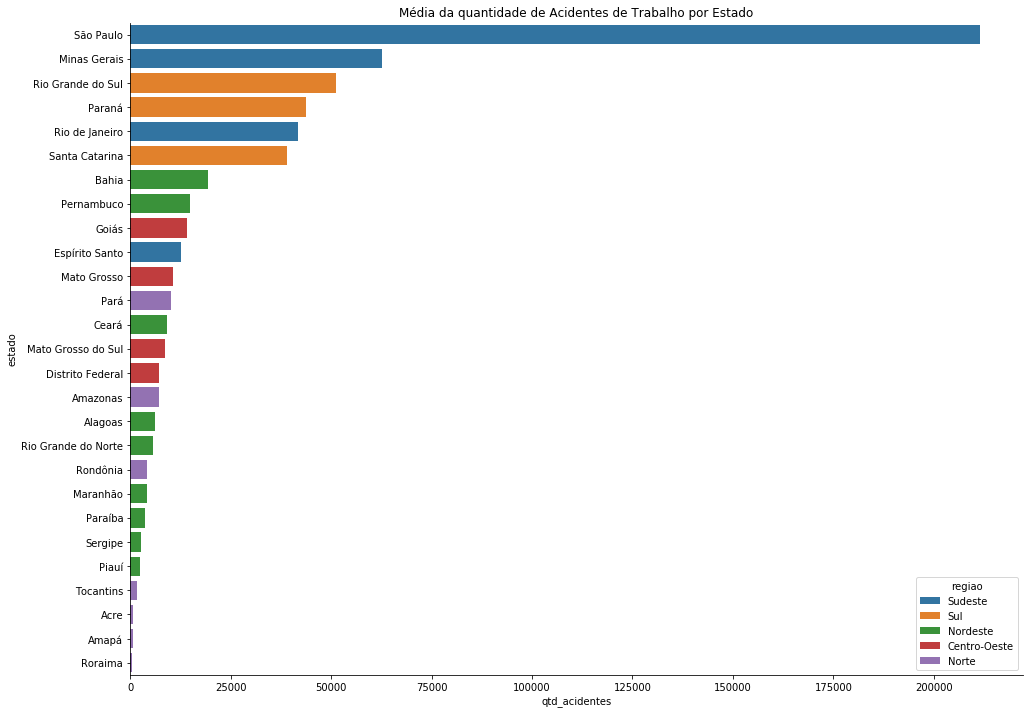

In [33]:
#representação grafica das médias
plt.figure(figsize = (16,12))
m = sns.barplot(y="estado",
                x ="qtd_acidentes",
                hue ="regiao",
                hue_order = ["Sudeste","Sul","Nordeste","Centro-Oeste","Norte"],
                dodge = False,
                data = agrupado_media);
m.set_title("Média da quantidade de Acidentes de Trabalho por Estado");
sns.despine()


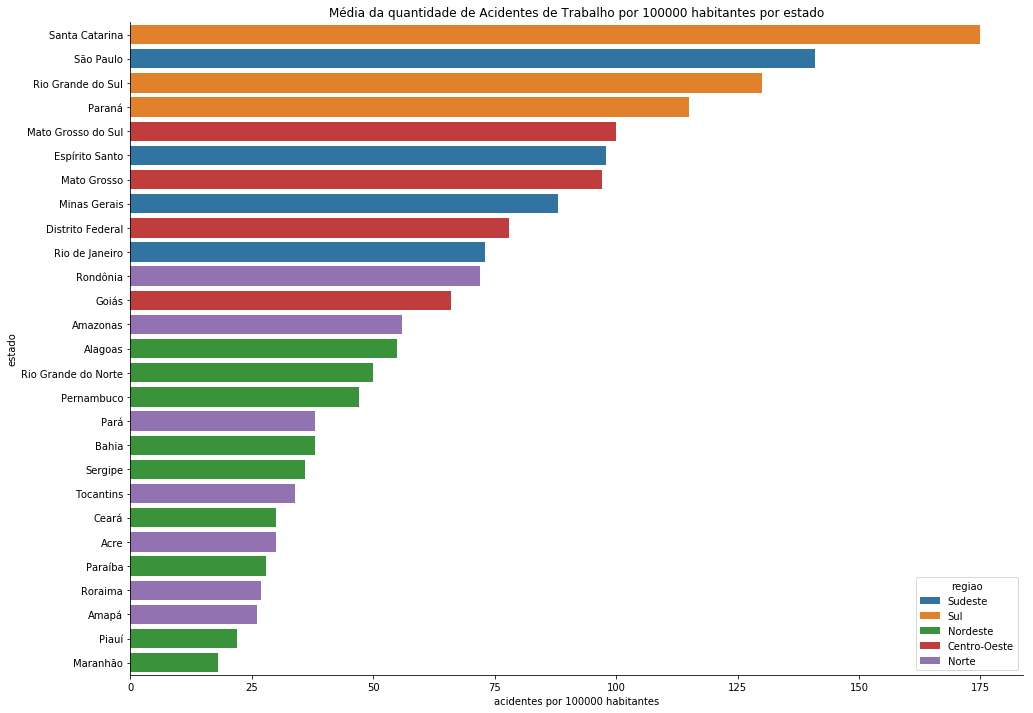

In [34]:
#representação gráfica das médias por 100000 habitantes
plt.figure(figsize = (16,12))
m = sns.barplot(y="estado",
                x ="acidentes_100",
                hue = "regiao",
                hue_order = ["Sudeste","Sul","Nordeste","Centro-Oeste","Norte"],
                dodge = False,
                data = per_capta);
m.set_title("Média da quantidade de Acidentes de Trabalho por 100000 habitantes por estado");
m.set_xlabel("acidentes por {} habitantes".format(100000))
sns.despine()


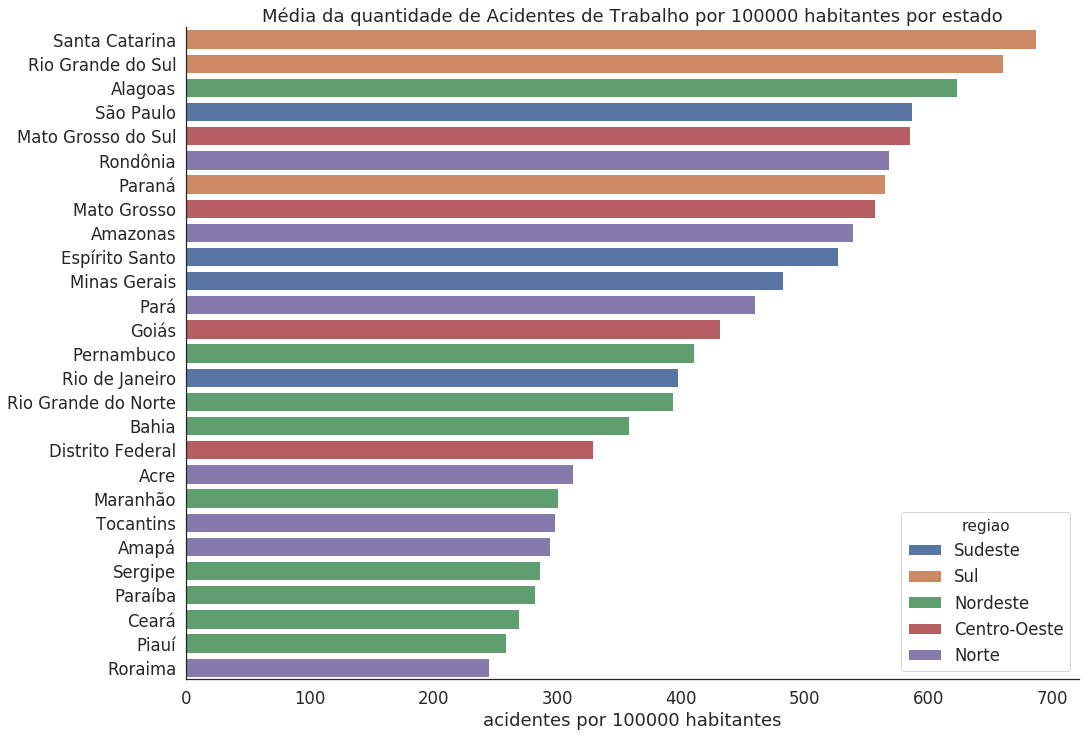

In [130]:
#representação gráfica das médias por 100000 habitantes
plt.figure(figsize = (16,12))
m = sns.barplot(y="estado",
                x ="acidentes_trab_100",
                hue = "regiao",
                hue_order = ["Sudeste","Sul","Nordeste","Centro-Oeste","Norte"],
                dodge = False,
                data = per_capta_trab);
m.set_title("Média da quantidade de Acidentes de Trabalho por 100000 habitantes por estado");
m.set_xlabel("acidentes por {} habitantes".format(100000))
m.set_ylabel("")
sns.despine()


## Distribuição da quantidade de acidentes por Motivo/Situação

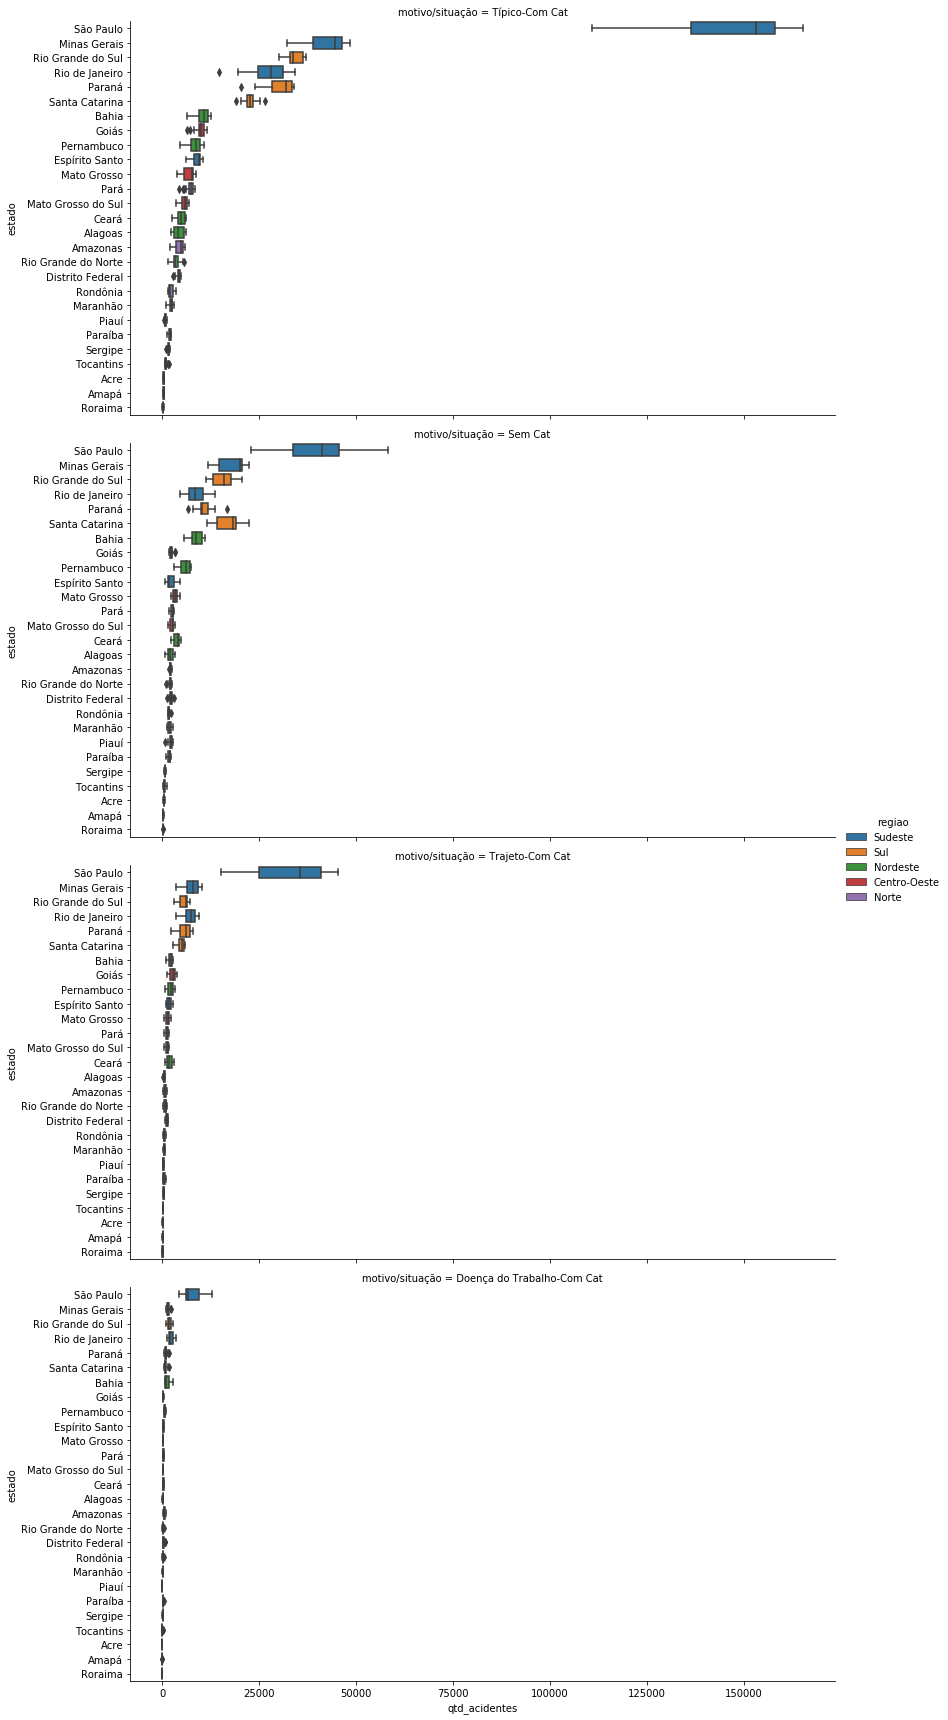

In [35]:
g = sns.catplot(x="qtd_acidentes",
                y="estado",
                kind = "box",
                row="motivo/situação",
                height = 6,
                aspect = 2,
                hue = "regiao",
                hue_order = ["Sudeste","Sul","Nordeste",
                             "Centro-Oeste","Norte"],
                dodge = False,
                data=df_uf.sort_values("qtd_acidentes",ascending=False))

Em termos da distribuição da quantidade de acidente por estado SP tem os valores com a maior variação, e desponta em todas as categorias de acidente. No entanto, quando se observa os valores em relação a população, as coisas mudam um pouco de figura

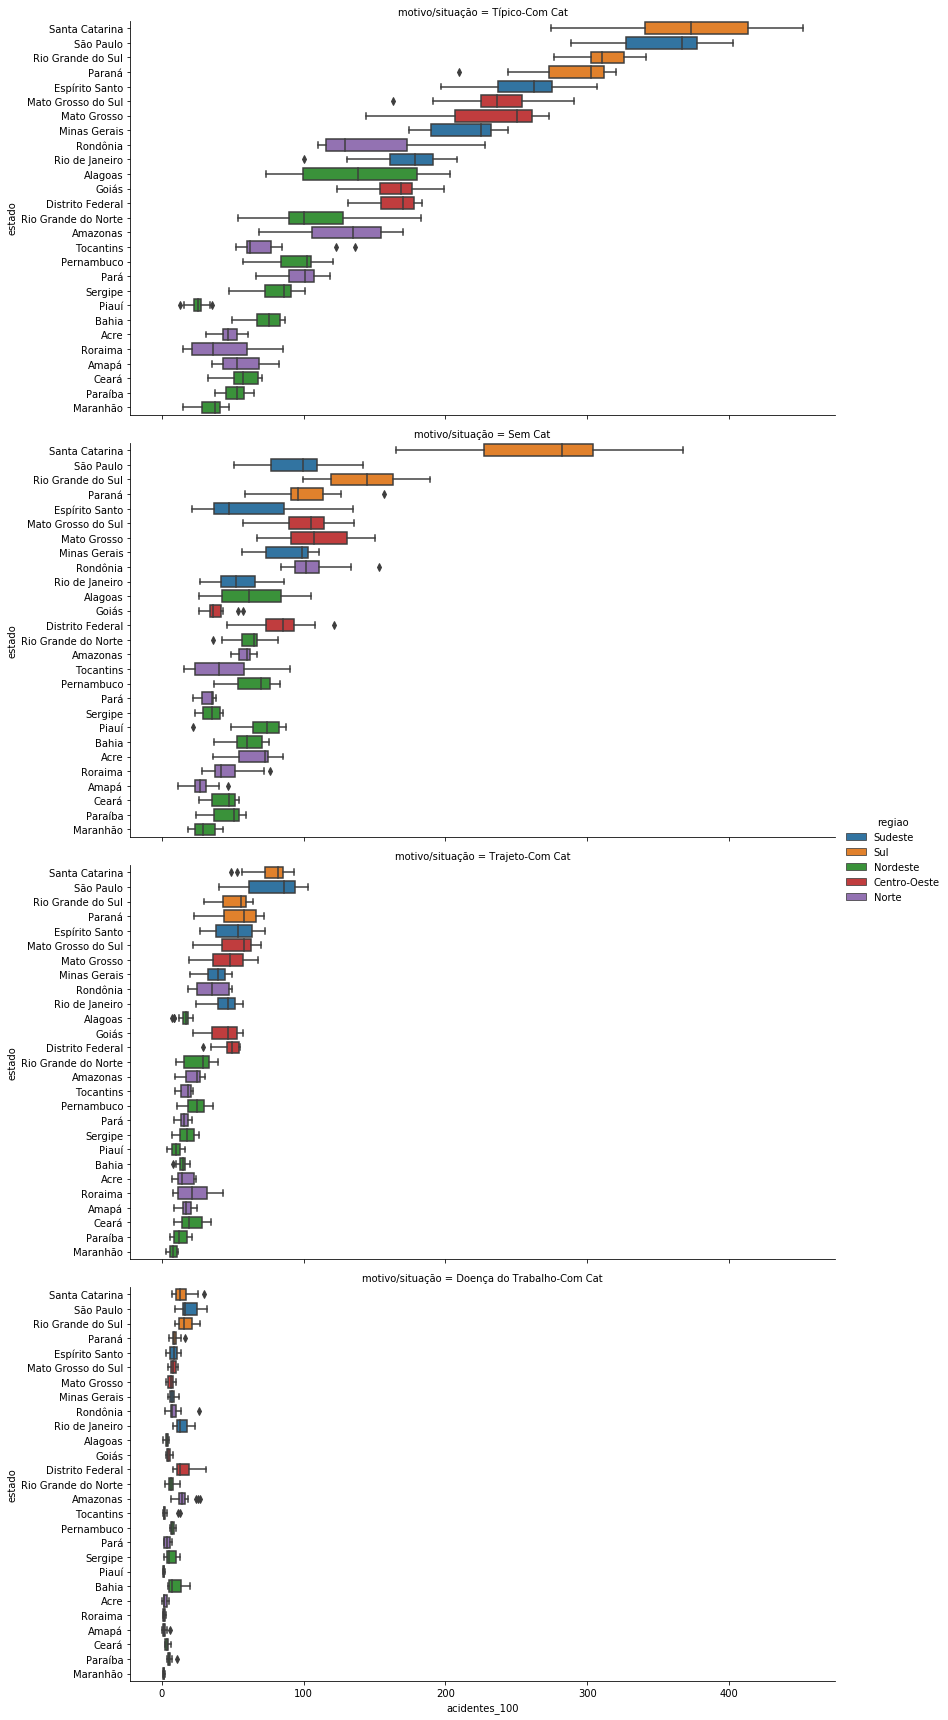

In [36]:

g = sns.catplot(x="acidentes_100",
                y="estado",
                kind = "box",
                row="motivo/situação",
                height = 6,
                aspect = 2,
                hue = "regiao",
                hue_order = ["Sudeste","Sul","Nordeste","Centro-Oeste","Norte"],
                dodge = False,
                data=df_uf.sort_values("acidentes_100",ascending=False))

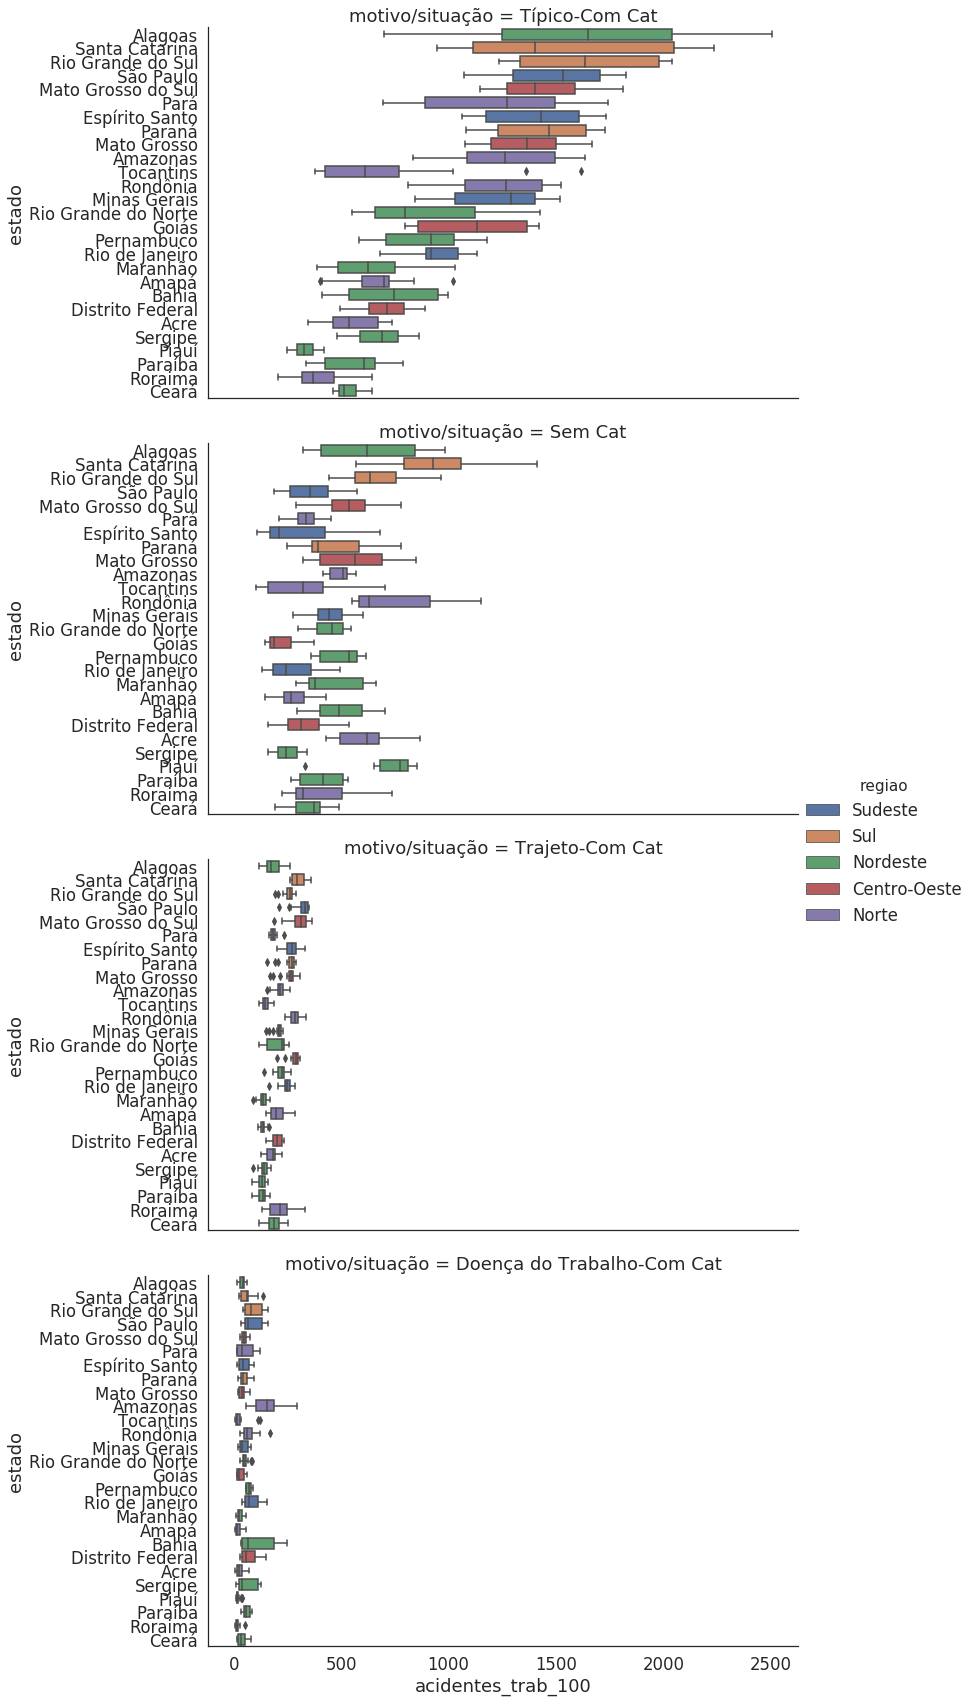

In [131]:
g = sns.catplot(x="acidentes_trab_100",
                y="estado",
                kind = "box",
                row="motivo/situação",
                height = 6,
                aspect = 2,
                hue = "regiao",
                hue_order = ["Sudeste","Sul","Nordeste","Centro-Oeste","Norte"],
                dodge = False,
                data=df_uf.sort_values("acidentes_trab_100",ascending=False))

## Quantidade de Acidentes por Região e por Ano

Os estados foram divididos por regiões de forma a melhorar a visualização do gráfico interativo abaixo.

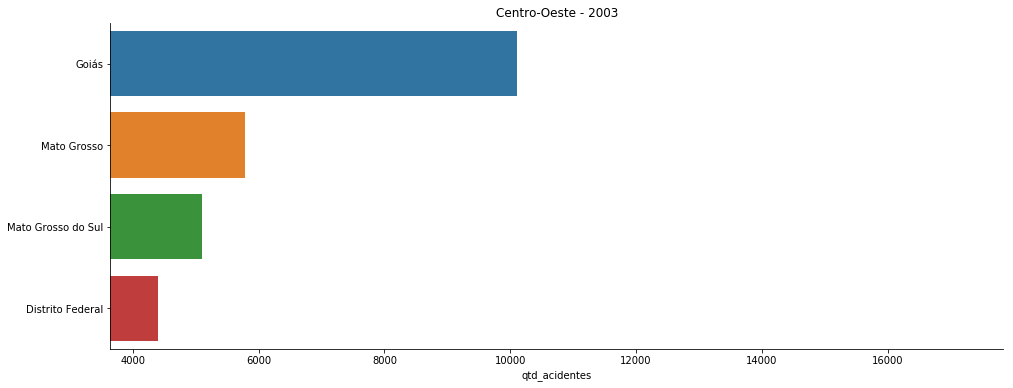

In [37]:
#@title Estados com mais acidentes por região por ano { run: "auto" }
ano = 2003 #@param {type:"slider", min:2001, max:2016, step:1}
regiao = "Centro-Oeste" #@param ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]

#agrupando o df por regiao
agrupado_regiao = agrupado[agrupado["regiao"]==regiao]

#criando o df para ser plotado
data = agrupado[agrupado["regiao"]==regiao]
data = data[data["ano"]==ano]
data.sort_values("qtd_acidentes",inplace=True,ascending=False)

#plotando
plt.figure(figsize =(16,6))
p = sns.barplot(y=list(data.estado.unique()),
                  x="qtd_acidentes",
                  data=data);
p.set_xlim(min(agrupado_regiao.qtd_acidentes)
           ,max(agrupado_regiao.qtd_acidentes))
p.set_title(regiao + " - "+str(ano));
sns.despine()

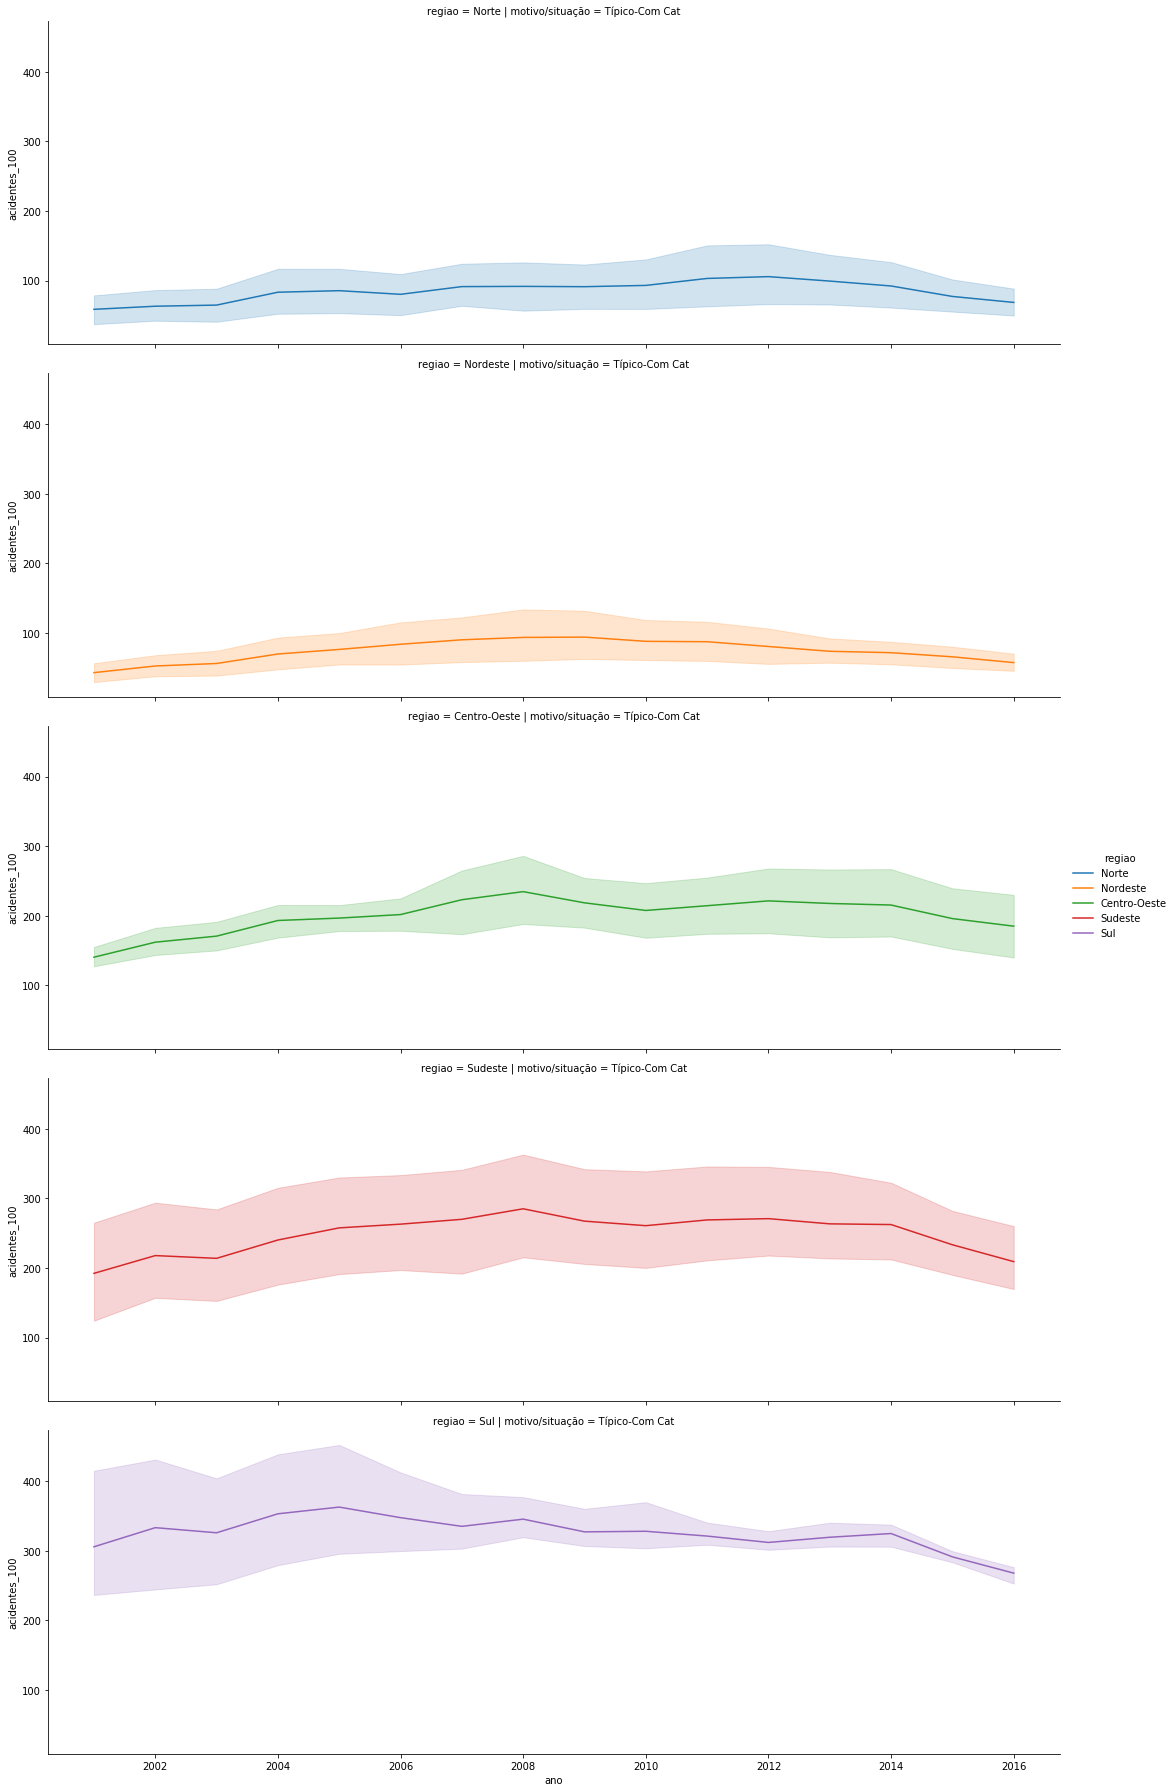

In [38]:
g = sns.FacetGrid(df_uf[df_uf["motivo/situação"]=="Típico-Com Cat"],
                  row = "regiao",
                  col = "motivo/situação",
                  height = 5,
                  aspect = 3,
                  sharey = True,
                  hue = "regiao");
g.map_dataframe(sns.lineplot,"ano","acidentes_100")
g.add_legend()

Observando a tendência das regiões do país, em termos da quantidade de acidentes a cada $100.000$ habidantes. 
* Os acidentes de Trajeto apresentam uma tendência de subida não muito expressiva para a região Sul, Sudeste e Norte. 
* Por outro lado, foi observado que os acidentes Típicos - Com Cat, apresentam uma tendência de queda para o Sul do país. É interessante notar que o Sul possuí valores mais dispersos em relação a média regional até 2012, e em seguida eles tendem a estar mais próximos da média de forma geral. Tal tendência não pode ser inferida para as outras regiões do país, devido a variabilidade alta de estado para estado.



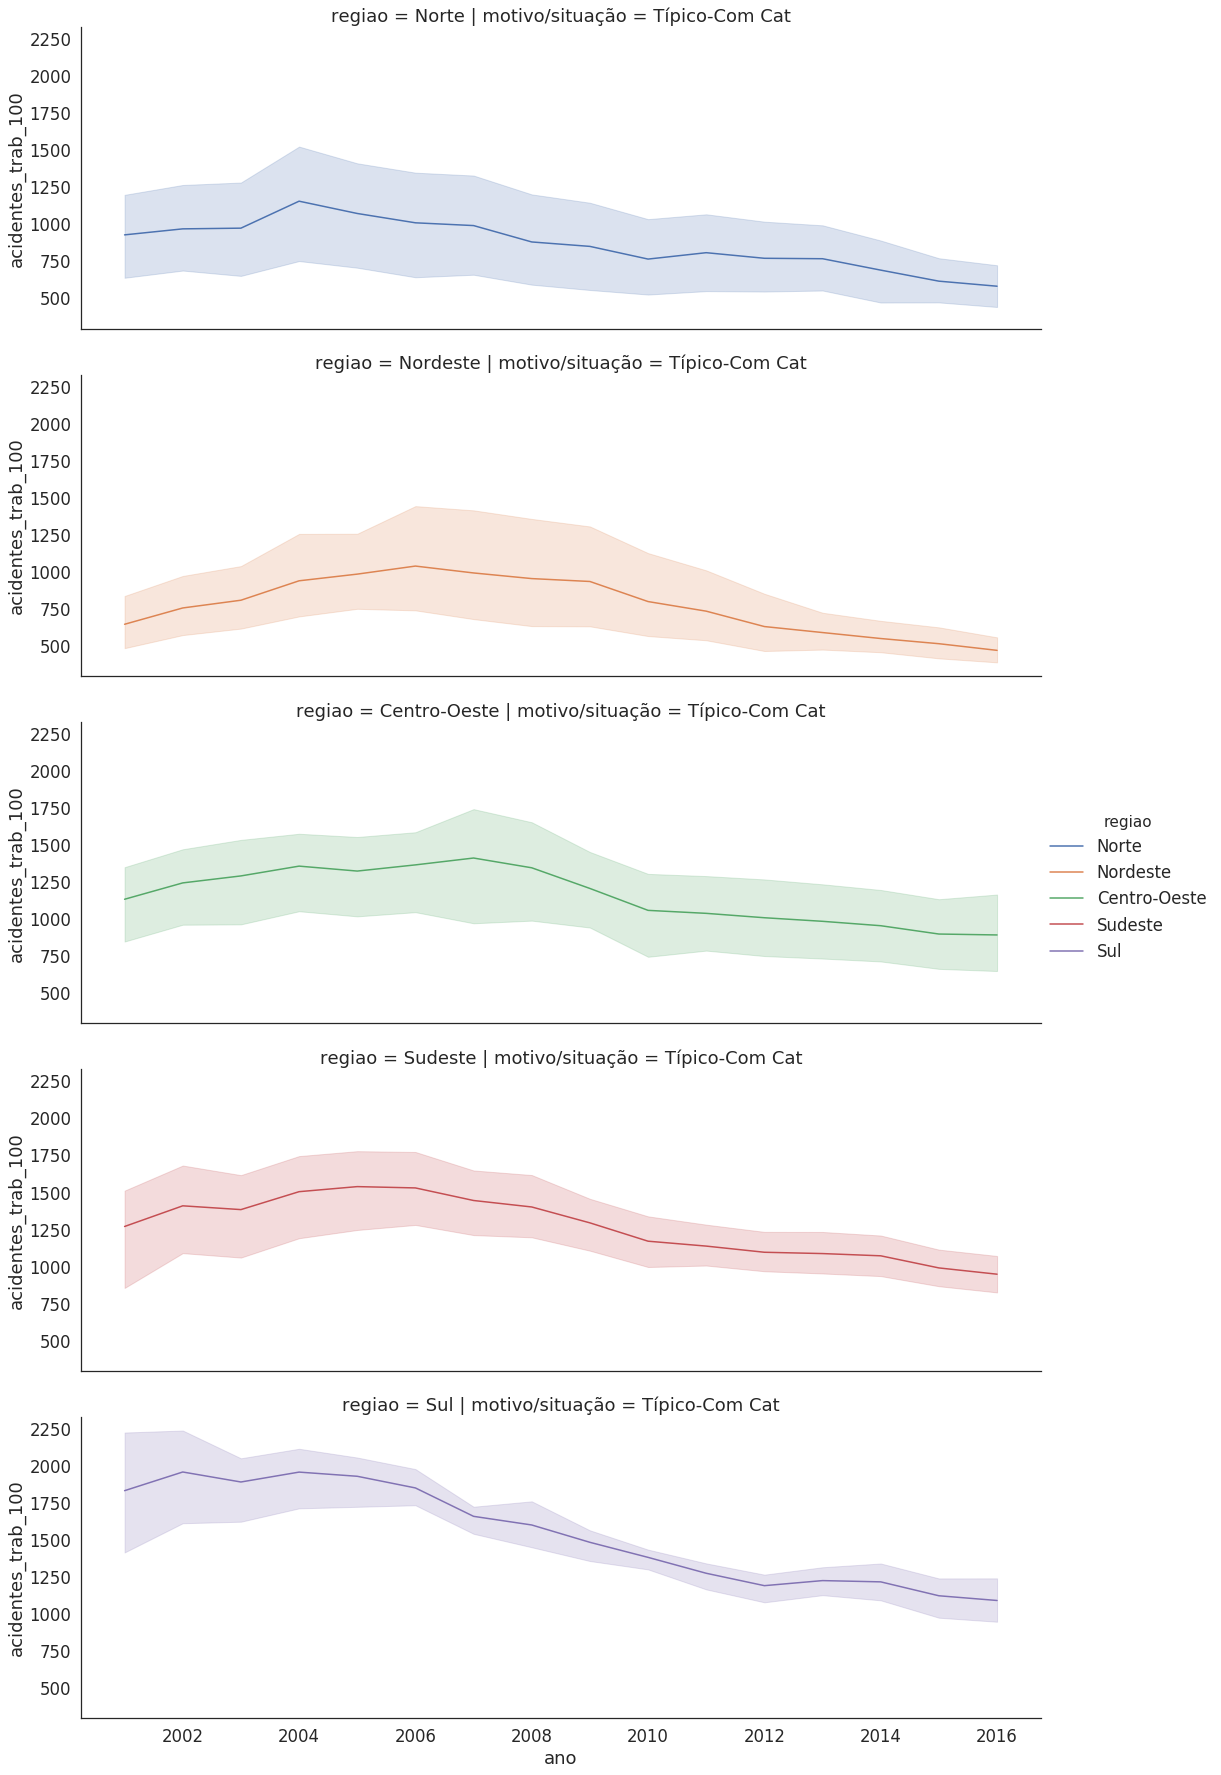

In [132]:
g = sns.FacetGrid(df_uf[df_uf["motivo/situação"]=="Típico-Com Cat"],
                  row = "regiao",
                  col = "motivo/situação",
                  height = 5,
                  aspect = 3,
                  sharey = True,
                  hue = "regiao");
g.map_dataframe(sns.lineplot,"ano","acidentes_trab_100")
g.add_legend()

<Figure size 1152x432 with 0 Axes>

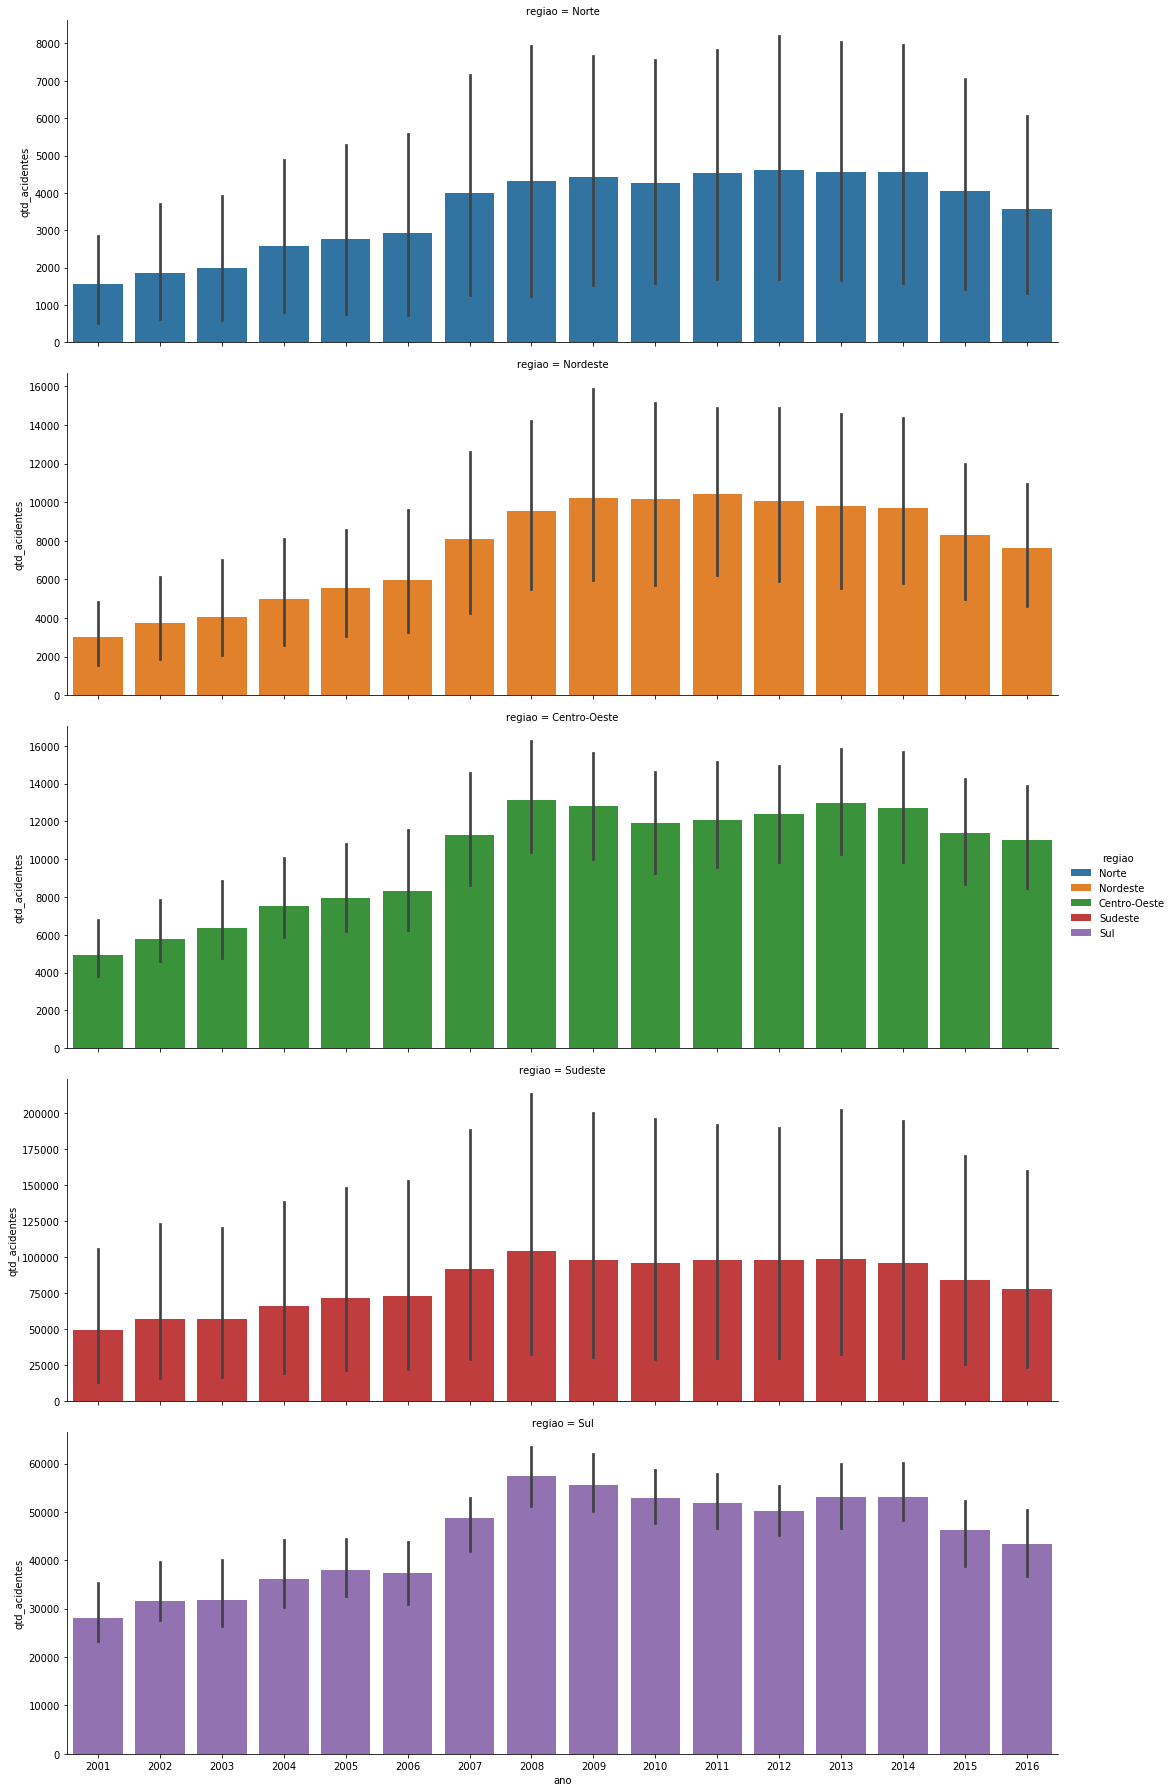

In [39]:
#evolução da quantidade total por região
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(agrupado,
                  row="regiao",
                  height = 5,
                  aspect = 3,
                  sharey=False,
                  hue = "regiao");


g.map_dataframe(sns.barplot,'ano',"qtd_acidentes").add_legend();


Em vista da média de acidentes ano a ano pode-se afirmar que as regiões Norte,
Nordeste e Centro-Oeste apresentaram um comportamento parecido ao longo dos anos. O
comportamento é descrito como uma crescente até 2008, seguido de um platô . O Sudeste
experimentou um aumento de mais de 40000 acidentes. Desde então a região têm presenciado
um progresso na área. A história é parecida para a região Sul que também sofreu uma alta de
mais de 20000 acidentes no mesmo período, e em seguida começou a ver sinais de queda de
2015 em diante.

### O mapa dos acidentes de trabalho

Agora com uma base de dados com as informações de latitude e longitude, meu objetivo é tentar retirar algumas informações com base na leitura de alguns mapas. Para isso usarei a biblioteca do Python Folium

In [0]:
import folium

### Mapa das médias dos acidentes

In [41]:
#@title  { run: "auto" }
ano = 2016 #@param {type:"slider", min:2001, max:2016, step:1}
df_uf_map = df_uf[df_uf["ano"]==ano]
df_uf_map = df_uf_map.groupby(['estado',
                                 'latitude',
                                 'longitude'],
                                as_index=False)[['qtd_acidentes']].sum()
df_uf_map.qtd_acidentes = df_uf_map.qtd_acidentes.astype("int64")




ac_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)
for i in range(0,len(df_uf_map)):
  folium.CircleMarker(
      location =[df_uf_map.iloc[i]['latitude'],
                 df_uf_map.iloc[i]['longitude']],
      popup = df_uf_map.iloc[i]['estado']+' ; '+df_uf_map.iloc[i]['qtd_acidentes'].astype('str'),
      radius=int(df_uf_map.iloc[i]['qtd_acidentes']/5000),
      fill_color="crimson"
  ).add_to(ac_map)


ac_map



In [42]:
from folium.plugins import HeatMap
heat_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)

heat_data = df_uf_map.drop(["estado"],axis=1)

max_amount = max(heat_data.qtd_acidentes)
#media_acidentes = heat_data.qtd_acidentes.mean()
#desvio_acidentes = heat_data.qtd_acidentes.std()

#heat_data["qtd_acidentes"]=(heat_data.qtd_acidentes-media_acidentes)/desvio_acidentes


HeatMap( list(zip(heat_data.latitude.values, heat_data.longitude.values,heat_data.qtd_acidentes.values)),
                  min_opacity=0.2,
                  max_val=max_amount,
                  radius=17, blur=15, 
                  max_zoom=1).add_to(heat_map)

heat_map

### Mapa da média a cada 100000 habitantes

In [43]:
#@title  { run: "auto" }
ano = 2001 #@param {type:"slider", min:2001, max:2016, step:1}
df_uf_map = df_uf[df_uf["ano"]==ano]
df_uf_map = df_uf_map.groupby(['estado',
                                 'latitude',
                                 'longitude'],
                                as_index=False)[['acidentes_100']].sum()
df_uf_map.acidentes_100 = df_uf_map.acidentes_100.astype("int64")




ac_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)
for i in range(0,len(df_uf_map)):
  folium.CircleMarker(
      location =[df_uf_map.iloc[i]['latitude'],
                 df_uf_map.iloc[i]['longitude']],
      popup = df_uf_map.iloc[i]['estado']+' ; '+df_uf_map.iloc[i]['acidentes_100'].astype('str'),
      radius=int(df_uf_map.iloc[i]['acidentes_100']/30),
      fill_color="crimson"
  ).add_to(ac_map)


ac_map


In [44]:
from folium.plugins import HeatMap
heat_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)

heat_data = df_uf_map.drop(["estado"],axis=1)

max_amount = max(heat_data.acidentes_100)
#media_acidentes = heat_data.acidentes_100.mean()
#desvio_acidentes = heat_data.acidentes_100.std()

#heat_data["acidentes_100"]=(heat_data.acidentes_100-media_acidentes)/desvio_acidentes



HeatMap( list(zip(heat_data.latitude.values, heat_data.longitude.values,heat_data.acidentes_100.values)),
                  min_opacity=0.2,
                  max_val=max_amount,
                  radius=17, blur=15, 
                  max_zoom=1).add_to(heat_map)


heat_map

## Acidentes de Trabalho por Sexo e Faixa Etária

segundo conjunto de dados a ser analisado consiste no recorte dos acidentes de
trabalho no brasil por faixa-etária e sexo.

In [45]:
#importando dados
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-faixaetaria-sexo.csv"
df_agesex = pd.read_csv(url, sep=",", encoding = "latin-1")
df_agesex.head()

,Ano,Idade,Motivo/Situação,Sexo,Qte Acidentes,Situação
0,1997,Até 19 Anos,Típico-Com Cat,Masculino,7581,Com Cat Registrada
1,1997,Até 19 Anos,Típico-Com Cat,Feminino,1061,Com Cat Registrada
2,1997,Até 19 Anos,Típico-Com Cat,Ignorado,18851,Com Cat Registrada
3,1997,20 a 24 Anos,Típico-Com Cat,Masculino,15847,Com Cat Registrada
4,1997,20 a 24 Anos,Típico-Com Cat,Feminino,1934,Com Cat Registrada


In [0]:
#renomeando colunas
df_agesex.columns = ["ano",
                     "idade",
                     "motivo/situacao",
                     "sexo",
                     "qtd_acidentes",
                     "situacao"]

In [47]:
df_agesex.sexo.value_counts()

Masculino    4452
Feminino     3886
Ignorado      396
-               1
Name: sexo, dtype: int64

In [48]:
df_agesex.idade.value_counts()

70 Anos e Mais    1073
40 a 44 Anos       719
45 a 49 Anos       716
35 a 39 Anos       715
25 a 29 Anos       706
50 a 54 Anos       705
30 a 34 Anos       703
20 a 24 Anos       703
55 a 59 Anos       673
Até 19 Anos        655
60 a 64 Anos       606
65 a 69 Anos       526
Ignorada           234
-                    1
Name: idade, dtype: int64

No que diz respeito a idade, existe um valor sem registro, que pode ser ignorado.

In [0]:
df_agesex = df_agesex[df_agesex.idade != "-"]

In [50]:
df_agesex.situacao.value_counts()

Com Cat Registrada    5991
Sem Cat Registrada    2743
Name: situacao, dtype: int64

Era de se esperar que a maior quantidade de acidentes de trabalho possuissem a CAT registrada, em vista da obrigação legal da empresa em emiti-la

In [51]:
#checando se existem valores nulos em alguma coluna
df_agesex.isnull().values.any()

False

In [52]:
#verificando os tipos dados
df_agesex.dtypes

ano                object
idade              object
motivo/situacao    object
sexo               object
qtd_acidentes      object
situacao           object
dtype: object

In [0]:
#modificando os tipos de dados
df_agesex[["ano","qtd_acidentes"]] = df_agesex[["ano","qtd_acidentes"]].astype("int")

In [0]:
#removendo o campo "Ignorado(a)"
df_agesex=df_agesex[df_agesex["sexo"]!="Ignorado"]
df_agesex=df_agesex[df_agesex["idade"]!="Ignorada"]

In [0]:
df_agesex=df_agesex[df_agesex["ano"]>=2001]

In [56]:
df_agesex.shape

(7843, 6)

In [57]:
df_agesex.describe()

,ano,qtd_acidentes
count,7843.000000,7843.000000
mean,2010.473798,1216.335331
std,3.572604,3080.187644
min,2001.000000,0.000000
25%,2008.000000,7.000000
50%,2011.000000,187.000000
75%,2013.000000,1359.500000
max,2016.000000,61309.000000


In [58]:
df_agesex.groupby(by = "idade")[["qtd_acidentes"]].describe()

qtd_acidentes               ...                  
                       count         mean  ...      75%      max
idade                                      ...                  
20 a 24 Anos           637.0  2394.948195  ...  2446.00  61309.0
25 a 29 Anos           643.0  2649.846034  ...  2783.50  59787.0
30 a 34 Anos           644.0  2406.023292  ...  2646.50  48054.0
35 a 39 Anos           656.0  1995.917683  ...  2405.25  40561.0
40 a 44 Anos           662.0  1648.138973  ...  2157.50  32276.0
45 a 49 Anos           664.0  1341.135542  ...  1860.00  23760.0
50 a 54 Anos           651.0   975.626728  ...  1432.00  14567.0
55 a 59 Anos           622.0   569.403537  ...   758.50   7300.0
60 a 64 Anos           558.0   228.799283  ...   282.75   2692.0
65 a 69 Anos           478.0    55.562762  ...    52.00    684.0
70 Anos e Mais        1025.0     7.606829  ...     7.00    238.0
Até 19 Anos            603.0   528.315091  ...   363.50  12550.0

[12 rows x 8 columns]

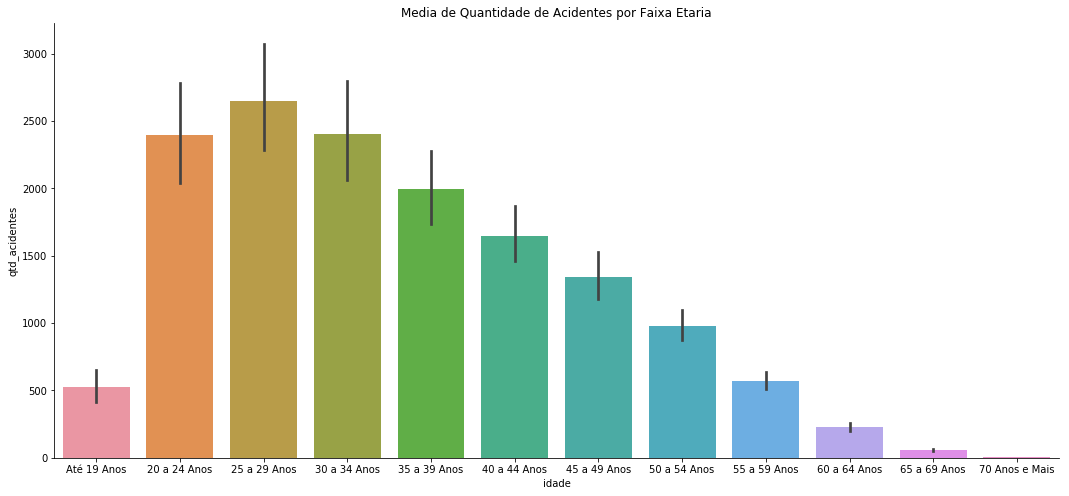

In [59]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "idade",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Faixa Etaria");
sns.despine()


É possivel se observar que em média, os acidentes acontecem em sua grande maioria na faixa dos 19 até os 39 anos. O que chama bastante a atenção é o fato de que até os 19 anos possuir uma quantidade tão alta de acidentes. Menores de idade não podem trabalhar, estagiários possuem diversas limitações em suas atividades, assim como jovens aprendizes. No entanto, a quantidade de acidentes registrado pra essa faixa etaria tão pequena (apenas 2 anos) é tão representativa quanto a média dos trabalhadores de 55 a 59 anos..

In [60]:
df_agesex.groupby(by = "sexo")[["qtd_acidentes"]].describe()

qtd_acidentes                            ...                        
                  count         mean          std  ...    50%     75%      max
sexo                                               ...                        
Feminino         3653.0   726.344374  1182.484371  ...  194.0  1103.0  13023.0
Masculino        4190.0  1643.527924  4018.732497  ...  175.5  1791.5  61309.0

[2 rows x 8 columns]

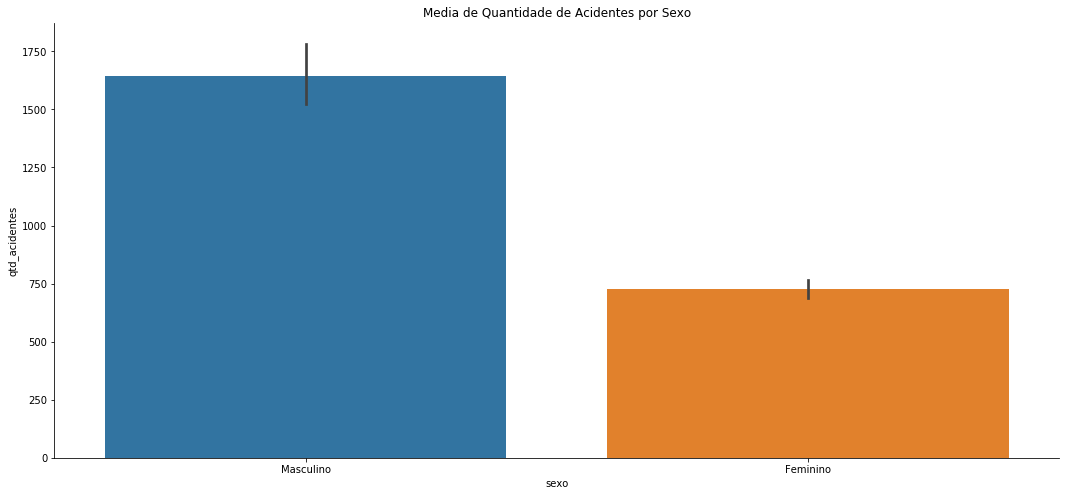

In [61]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "sexo",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Sexo");
sns.despine()

Os dados nos mostram quem em termos da média os homens se acidentam 2,5x mais que as mulheres. No entanto, Ate o terceiro quartil (75%) a quantidade de acidentes para os dois sexos é parecida. Nesse sentido é interessante observar, também, que a distribuição dos acidentes de trabalho que ocorrem com mulheres ao longo dos anos possuem  uma distribuição mais apertada, em relação aos homens.



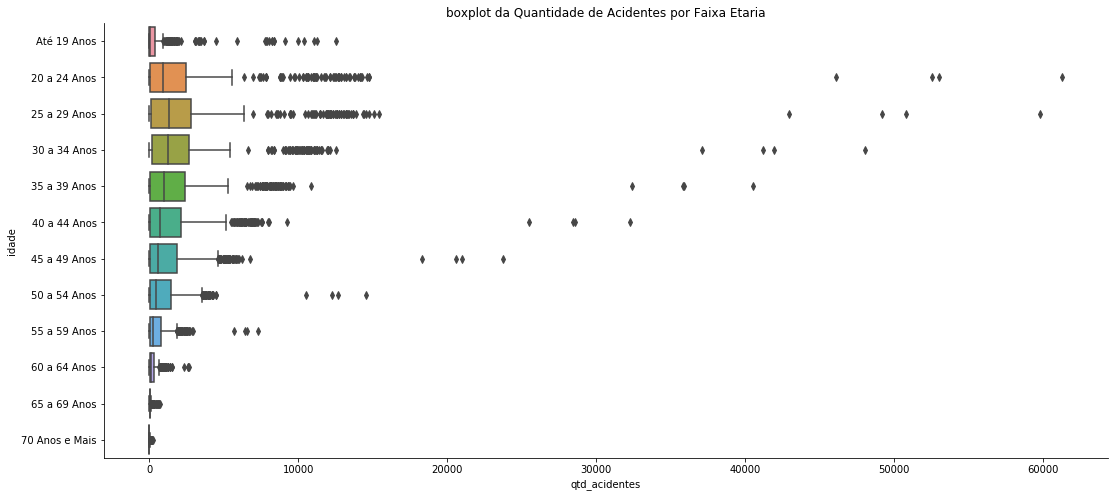

In [62]:
plt.figure(figsize = (18,8))

g = sns.boxplot(data = df_agesex,
                y = "idade",
                x = "qtd_acidentes")
g.set_title("boxplot da Quantidade de Acidentes por Faixa Etaria");
sns.despine()


Como pode ser observado, os acidentes por faixa etaria tem uma natureza dispersa com diversos outliers. Para entender melhor os dados será necessária a observação da faixa etaria e contrasta-la por sexo.

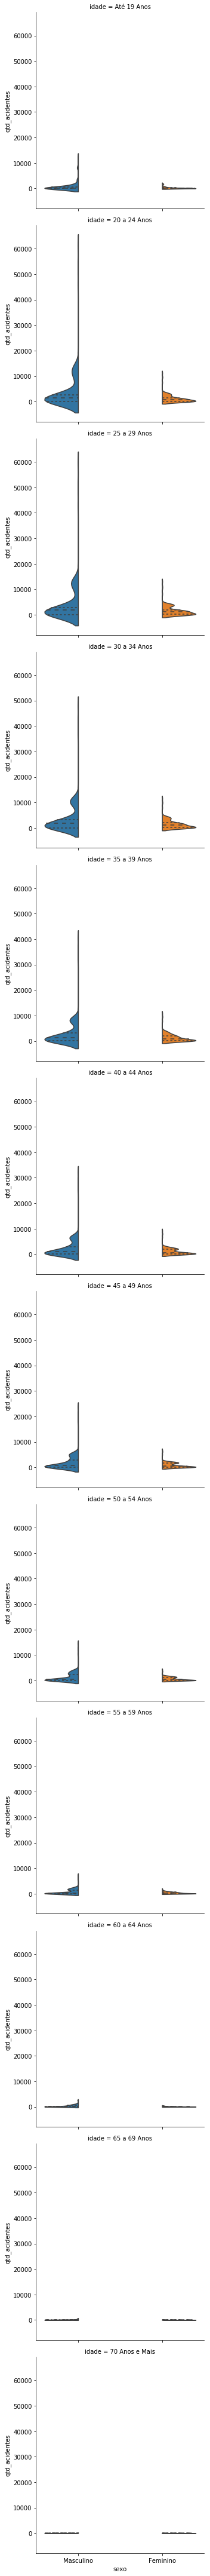

In [63]:
g = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                row = "idade",
                kind = "violin",
                hue = "sexo",
                split = True,
                inner = "quartile")

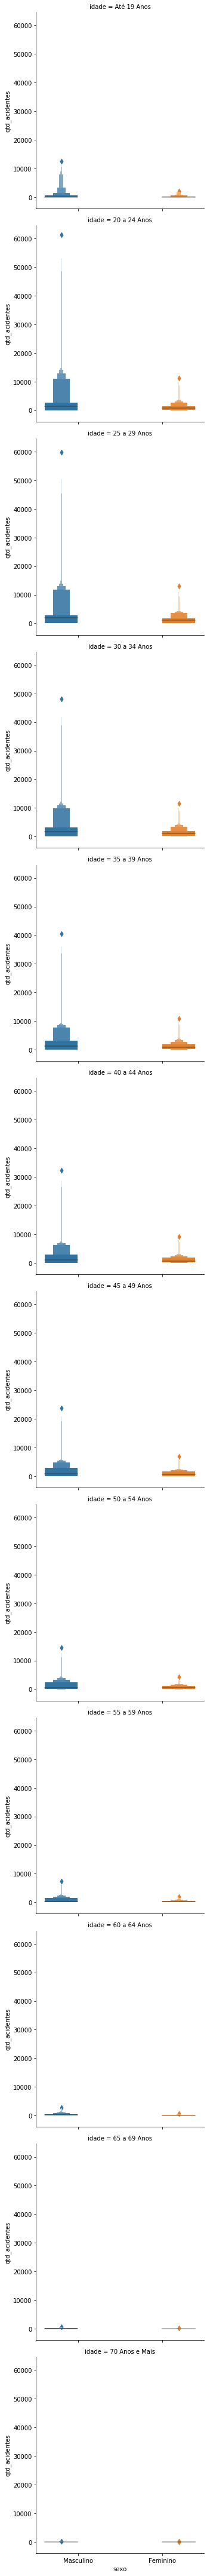

In [64]:
ax = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                row = "idade",
                kind = "boxen",
                hue = "sexo")


### Piramide etaria dos acidentes de trabalho

In [65]:
#criando um df que agrega todos os motivos e situações e apresenta o valor total de acidentes
df_agesex_agg = df_agesex.groupby(by=["ano","idade","sexo"])[["qtd_acidentes"]].sum()
df_agesex_agg.reset_index(inplace=True)
df_agesex_agg.sort_values(by=["ano","idade"])

,ano,idade,sexo,qtd_acidentes
0,2001,20 a 24 Anos,Feminino,10355
1,2001,20 a 24 Anos,Masculino,52363
2,2001,25 a 29 Anos,Feminino,11635
3,2001,25 a 29 Anos,Masculino,49311
4,2001,30 a 34 Anos,Feminino,11318
5,2001,30 a 34 Anos,Masculino,42803
6,2001,35 a 39 Anos,Feminino,11222
7,2001,35 a 39 Anos,Masculino,37608
8,2001,40 a 44 Anos,Feminino,9766
9,2001,40 a 44 Anos,Masculino,30036


In [66]:
#ordenando faixa etaria
ordered_age = ['Até 19 Anos','20 a 24 Anos', '25 a 29 Anos',
               '30 a 34 Anos', '35 a 39 Anos','40 a 44 Anos',
               '45 a 49 Anos', '50 a 54 Anos', '55 a 59 Anos',
               '60 a 64 Anos', '65 a 69 Anos', '70 Anos e Mais']

#encodando a faixa etaria
df_agesex_agg["idade_code"]=df_agesex_agg.idade.astype("category",
                                                        ordered=True,
                                                        categories = ordered_age).cat.codes
#ordenando pela faixa etaria
df_agesex_agg.sort_values(by="idade_code",inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [0]:
#criando um campo onde a qtd de acidentes troque o sinal, dependendo do sexo
df_agesex_agg["piram"]=df_agesex_agg[["qtd_acidentes","sexo"]].apply(lambda x:
                                                              x["qtd_acidentes"] if x["sexo"]=="Feminino" else x["qtd_acidentes"]*(-1),
                                                              axis =1)

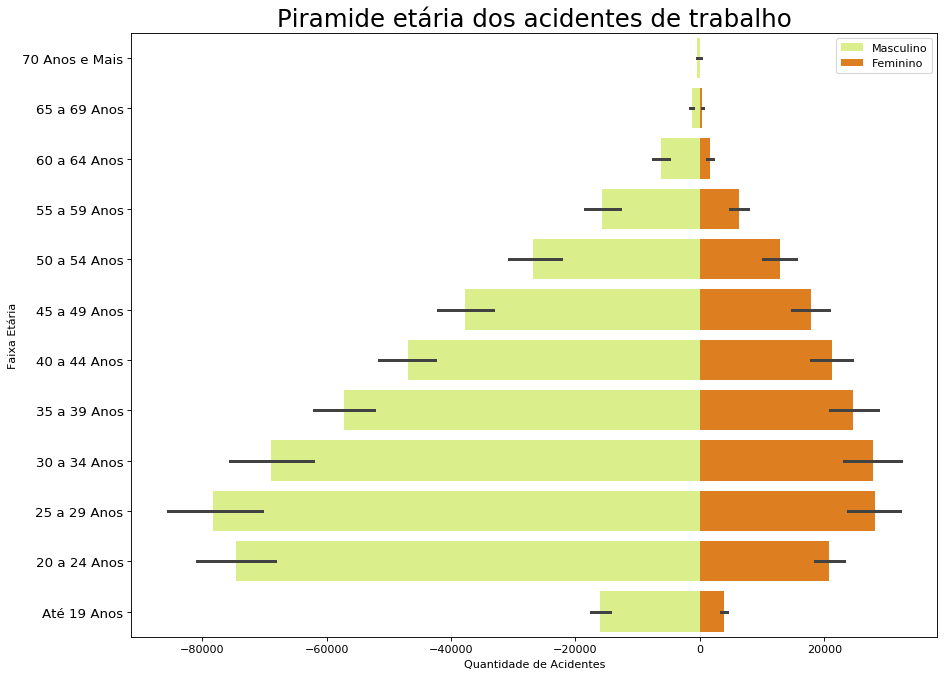

In [68]:
#desenhando a figura
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'sexo'
order_of_bars = df_agesex_agg.idade.unique()[::-1]
colors = [plt.cm.Wistia(i/float(len(df_agesex_agg[group_col].unique())-1)) for i in range(len(df_agesex_agg[group_col].unique()))]

for c, group in zip(colors, df_agesex_agg[group_col].unique()):
    sns.barplot(x='piram', y='idade', data=df_agesex_agg.loc[df_agesex_agg[group_col]==group, :], order=order_of_bars, color=c, label=group)
    
#decorativo
plt.xlabel("Quantidade de Acidentes")
plt.ylabel("Faixa Etária")
plt.yticks(fontsize=12)
plt.title("Piramide etária dos acidentes de trabalho", fontsize=22)
plt.legend()
plt.show()


Essa pirâmide nos mostra que em média as mulheres se acidentam menos que os homens em todas as faixas etárias. Mostra também que a quantidade de acidentes possui um pico na faixa dos 25 aos 29 anos tanto para homens como para mulheres. Pelas barras de erro, vemos que as mulheres possuem a média de quantidade de acidentes menos dispersa na distribuição, em contraste com a dos homens. Por fim, Com os dados em questão, é possível também comparar essa pirâmide ano a ano e ir observando sua evolução.

In [0]:
#pegando os valores unicos do campo "ano"
anos = df_agesex_agg.sort_values("ano").ano.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


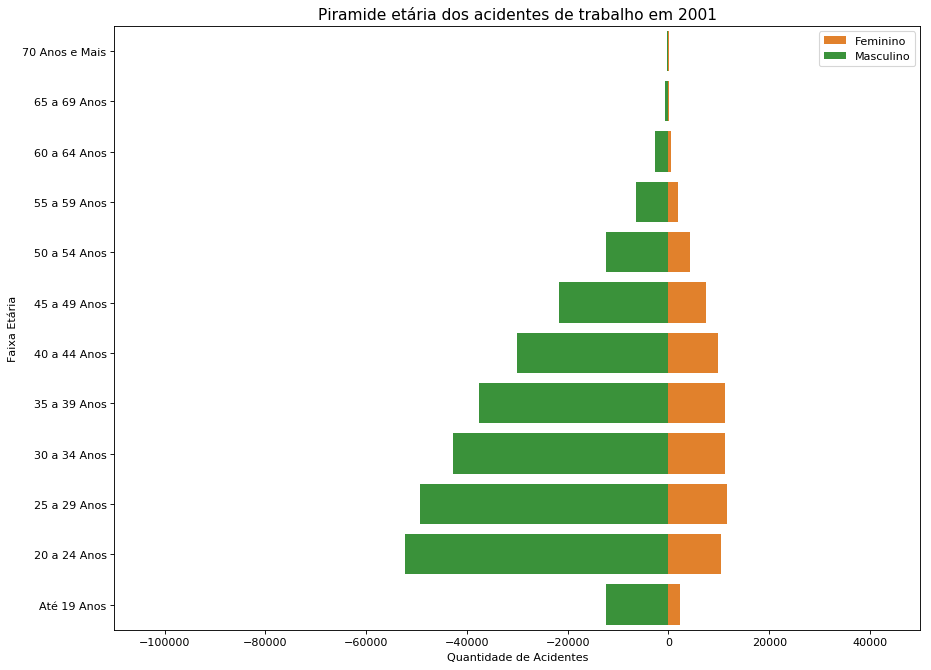

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


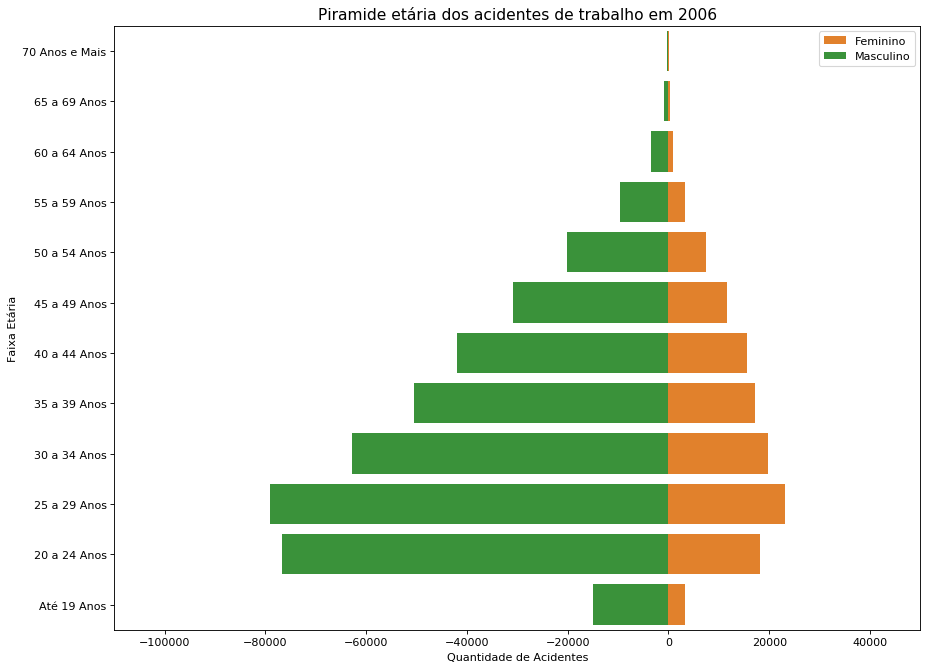

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


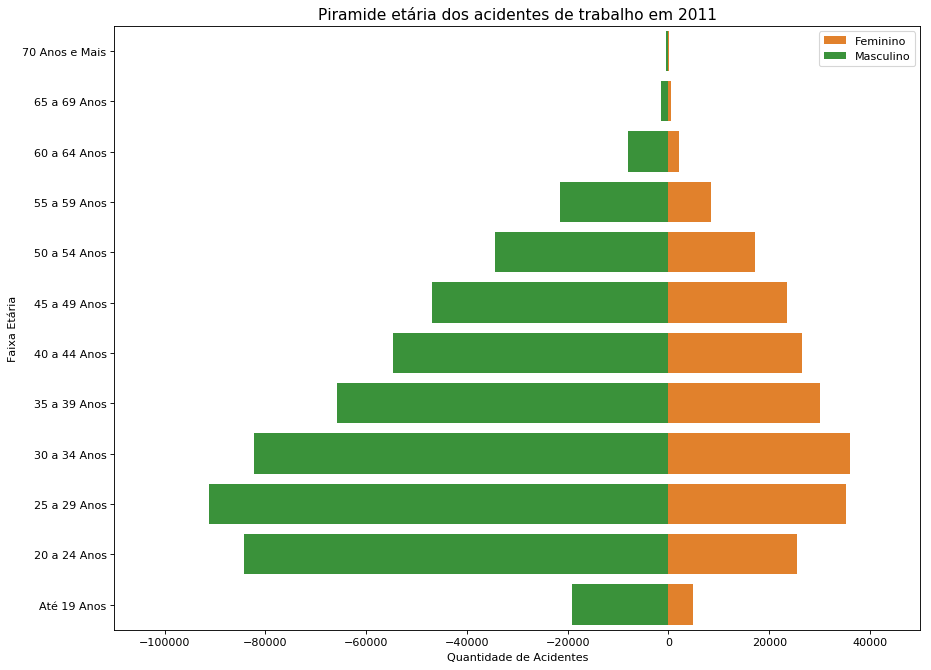

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


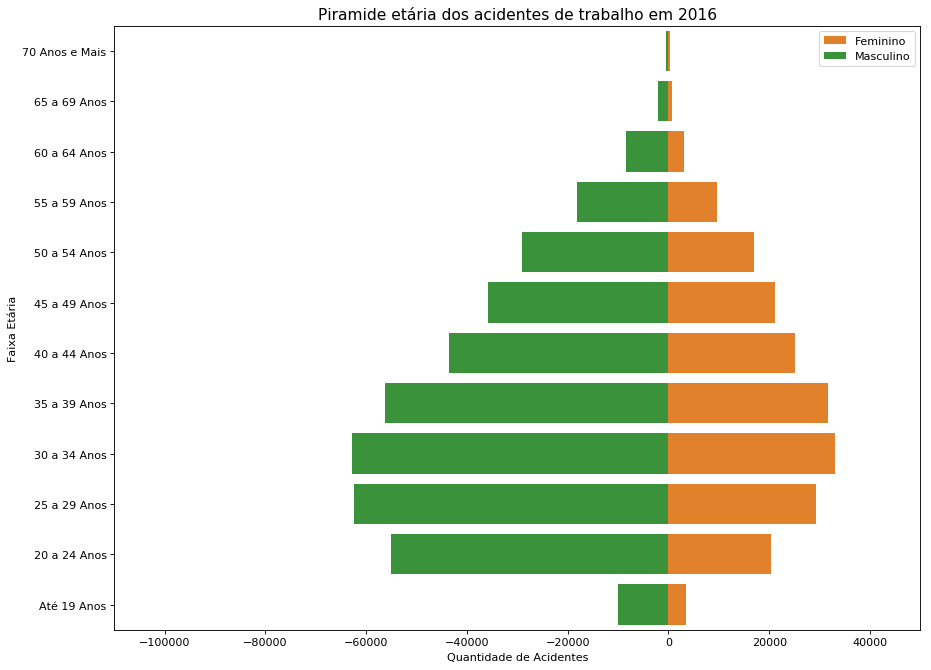

In [70]:
for i in anos[::5]:
  df_ano = df_agesex_agg[df_agesex_agg["ano"]==i]
#desenhando a figura
  plt.figure(figsize=(13,10), dpi= 80)
  group_col = 'sexo'
  order_of_bars = df_ano.idade.unique()[::-1]
  colors = ["C1","C2"]
  df_ano.sort_values("sexo",inplace=True)
  
  for c, group in zip(colors, df_ano[group_col].unique()):
      sns.barplot(x='piram', y='idade', data=df_ano.loc[df_ano[group_col]==group, :], order=order_of_bars, color=c, label=group)
#decorativo
  plt.xlabel("Quantidade de Acidentes")
  plt.xlim((-110000,50000))
  plt.ylabel("Faixa Etária")
  plt.yticks(fontsize=10)
  plt.title("Piramide etária dos acidentes de trabalho em {}".format(i), fontsize=14)
  plt.legend()
  plt.show()

In [71]:
df_agesex.head()

,ano,idade,motivo/situacao,sexo,qtd_acidentes,situacao
468,2001,Até 19 Anos,Típico-Com Cat,Masculino,11035,Com Cat Registrada
469,2001,Até 19 Anos,Típico-Com Cat,Feminino,1841,Com Cat Registrada
471,2001,20 a 24 Anos,Típico-Com Cat,Masculino,46086,Com Cat Registrada
472,2001,20 a 24 Anos,Típico-Com Cat,Feminino,7519,Com Cat Registrada
474,2001,25 a 29 Anos,Típico-Com Cat,Masculino,42949,Com Cat Registrada


In [0]:
df_agesex_agg = df_agesex.groupby(by=["ano",
                                      "sexo",
                                      "idade",
                                      "motivo/situacao"])[["qtd_acidentes"]].sum()
df_agesex_agg.reset_index(inplace=True)

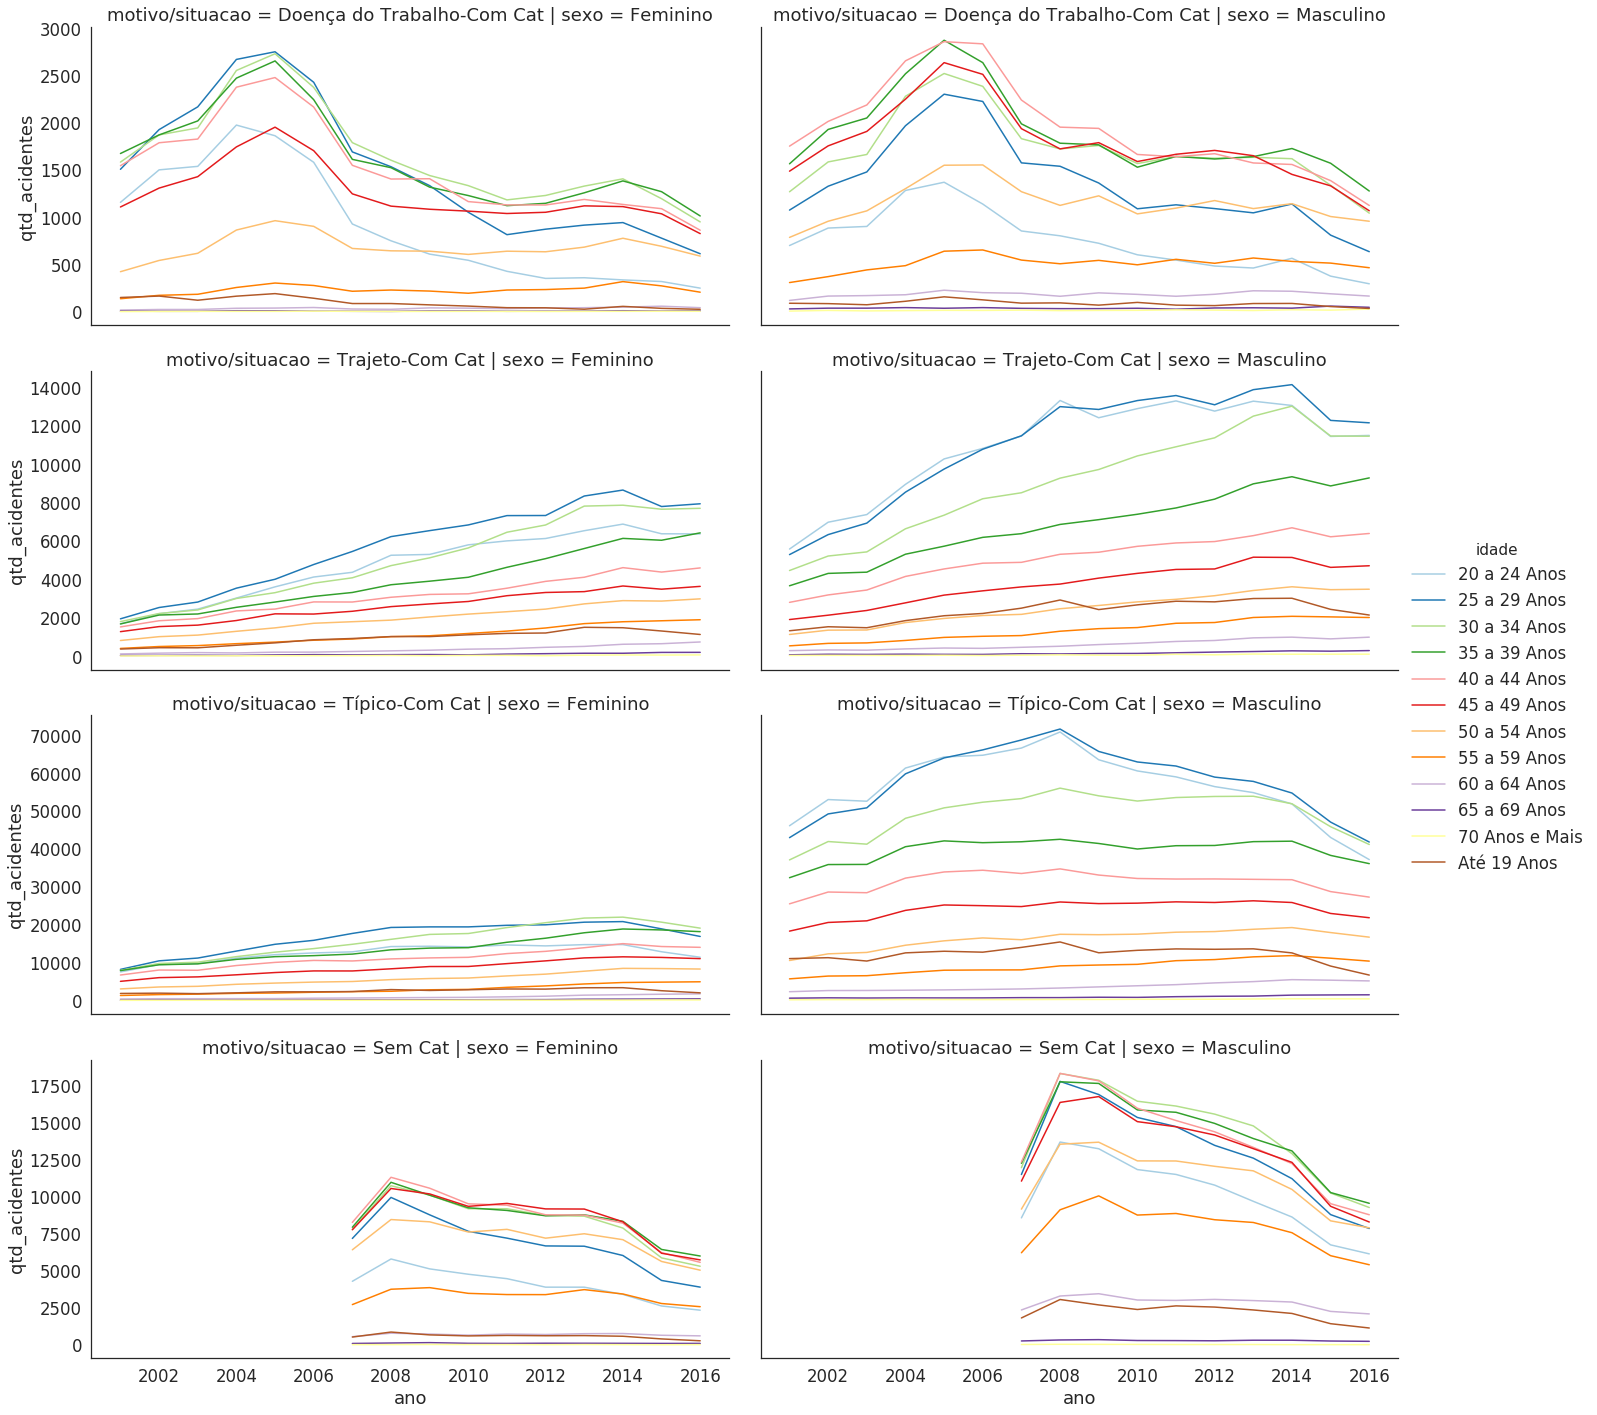

In [73]:
sns.set(font_scale=1.5,style="white")
g = sns.FacetGrid(data = df_agesex_agg,
                  row = "motivo/situacao",
                  col = "sexo",
                  hue = "idade",
                  palette = "Paired",
                  height = 5,
                  aspect = 2,
                  sharey = "row")

g.map_dataframe(sns.lineplot,"ano","qtd_acidentes")
g.add_legend()


## Acidentes de Trabalho por Parte do Corpo Atingida

In [74]:
#importando dados
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-pca.csv"
df_pca = pd.read_csv(url, sep=",", encoding = "latin-1")
df_pca.head()

,Ano,Parte atingida,Motivo/Situação,Qte Acidentes,Situação
0,2002,Crânio (Inclusive Encéfalo),Típico-Com Cat,735,Com Cat Registrada
1,2002,Crânio (Inclusive Encéfalo),Trajeto-Com Cat,358,Com Cat Registrada
2,2002,Crânio (Inclusive Encéfalo),Doença do Trabalho-Com Cat,7,Com Cat Registrada
3,2002,"Ouvido (Externo, Médio, Interno, Audição e Eq",Típico-Com Cat,1947,Com Cat Registrada
4,2002,"Ouvido (Externo, Médio, Interno, Audição e Eq",Trajeto-Com Cat,36,Com Cat Registrada


Vale ressaltar que para essa base os dados são de 2002 até 2016

In [0]:
df_pca.columns = ["ano","pca","motivo/situação","qtd_acidentes","situacao"]

In [76]:
df_pca.isnull().sum()

ano                0
pca                0
motivo/situação    0
qtd_acidentes      0
situacao           1
dtype: int64

Apenas uma coluna com valor vazio. será descartada

In [0]:
df_pca.dropna(axis = 0, inplace = True)

In [78]:
df_pca["motivo/situação"].value_counts()

Típico-Com Cat                667
Doença do Trabalho-Com Cat    666
Trajeto-Com Cat               665
Sem Cat                        40
Name: motivo/situação, dtype: int64

In [79]:
df_pca["situacao"].value_counts()

Com Cat Registrada    1998
Sem Cat Registrada      40
Name: situacao, dtype: int64

O campo situação apresenta apenas um agrupamento do campo "Motivo/Situação". Portanto, optou-se por removê-lo

In [0]:
#removendo o campo situação
df_pca.drop("situacao",axis =1,inplace = True)

In [81]:
df_pca.pca.value_counts()

Ignorada                                         49
Mandíbula (Inclusive Queixo)                     45
Perna (Do Tornozelo, Exclusive, ao Joelho, Ex    45
Membros Inferiores, Partes Múltiplas             45
Coxa                                             45
Dedo                                             45
Sistema Nervoso                                  45
Abdome (Inclusive Órgãos Internos)               45
Membros Superiores, não Informado                45
Ombro                                            45
Cabeça, Partes Múltiplas                         45
Braço (Acima do Cotovelo)                        45
Membros Inferiores, não Informado                45
Sistema Músculo-Esquelético                      45
Crânio (Inclusive Encéfalo)                      45
Cabeça, não Informado                            45
Cotovelo                                         45
Artelho                                          45
Joelho                                           45
Membros Supe

In [0]:
#aglomerando as partes do corpo atingidas
df_pca.pca = df_pca.pca.str.split("(").str[0]
df_pca.pca = df_pca.pca.str.split(",").str[0]

In [83]:
df_pca.pca.value_counts()

Cabeça                          90
Braço                           90
Membros Inferiores              90
Tronco                          90
Membros Superiores              90
Perna                           90
Sistemas e Aparelhos            90
Ignorada                        49
Ouvido                          45
Sistema Músculo-Esquelético     45
Pé                              45
Face                            45
Ombro                           45
Boca                            45
Cotovelo                        45
Quadris                         45
Artelho                         45
Crânio                          45
Joelho                          45
Tórax                           45
Nariz                           45
Sistema Nervoso                 45
Olho                            45
Dedo                            45
Coxa                            45
Punho                           45
Antebraço                       45
Mão                             45
Abdome              

In [84]:
#verificando tipo dos dados
df_pca.dtypes

ano                object
pca                object
motivo/situação    object
qtd_acidentes      object
dtype: object

In [0]:
#corrigindo tipo dos dados
df_pca.qtd_acidentes = df_pca.qtd_acidentes.astype("int64")
df_pca.ano = df_pca.ano.astype("int64")

In [0]:
#agrupando os dados
df_pca = df_pca.groupby(by = ["ano",
                              "pca",
                              "motivo/situação"])[["qtd_acidentes"]].sum()
df_pca.reset_index(inplace=True)

será necessário também remover os acidentes cuja PCA foi ignorada ou não descrita

In [0]:
#removendo campos ignorados e nao informados
df_pca = df_pca[(df_pca["pca"]!="Ignorada") & (df_pca["pca"]!="Parte do Corpo não Informada")]

In [88]:
df_pca.groupby("pca")[["qtd_acidentes"]].describe()

qtd_acidentes                ...                    
                                    count          mean  ...       75%       max
pca                                                      ...                    
Abdome                               45.0   1264.577778  ...    2422.0    3298.0
Antebraço                            45.0   6428.422222  ...   13889.0   17084.0
Aparelho Circulatório                45.0     51.133333  ...      76.0     141.0
Aparelho Digestivo                   45.0    159.333333  ...     214.0     975.0
Aparelho Gênito-Urinário             45.0    121.000000  ...     221.0     315.0
Aparelho Respiratório                45.0    403.355556  ...     734.0    1709.0
Artelho                              45.0    656.533333  ...    1521.0    1987.0
Articulação do Tornozelo             45.0   5750.422222  ...   10830.0   14171.0
Boca                                 45.0    816.644444  ...    1695.0    2488.0
Braço                                45.0   8225.444444  ...   17143.0   18590.0
Cabeça                               45.0   6667.422222  ...   14563.0   17758.0
Cotovelo                             45.0   1633.666667  ...    2887.0    3851.0
Coxa                                 45.0   1051.911111  ...    2320.0    3014.0
Crânio                               45.0    449.311111  ...     796.0     950.0
Dedo                                 45.0  40917.333333  ...  107301.0  135595.0
Dorso                                45.0   7251.200000  ...   14167.0   21866.0
Face                                 45.0   2657.044444  ...    5995.0    7950.0
Joelho                               45.0   8526.844444  ...   16580.0   20404.0
Mandíbula                            45.0    268.888889  ...     578.0     729.0
Membros Inferiores                   45.0   3024.111111  ...    5097.0    6749.0
Membros Superiores                   45.0   4295.733333  ...    6250.0    8220.0
Mão                                  45.0  13306.533333  ...   35753.0   39073.0
Nariz                                45.0    617.177778  ...    1409.0    1879.0
Olho                                 45.0   5653.111111  ...   15491.0   19729.0
Ombro                                45.0   5742.466667  ...    8660.0   10089.0
Ouvido                               45.0   1079.577778  ...    1466.0    3937.0
Partes Múltiplas                     45.0   6093.800000  ...    9790.0   13664.0
Perna                                45.0  11441.133333  ...   22408.0   25105.0
Pescoço                              45.0    678.266667  ...    1310.0    1627.0
Punho                                45.0   3982.244444  ...    7707.0    9476.0
Pé                                   45.0  12680.666667  ...   28244.0   33778.0
Quadris                              45.0   1131.422222  ...    2063.0    3125.0
Sistema Músculo-Esquelético          45.0    170.533333  ...     307.0     419.0
Sistema Nervoso                      45.0   1918.555556  ...    2860.0   10507.0
Sistemas e Aparelhos                 45.0    374.866667  ...     590.0     923.0
Tronco                               45.0   1849.488889  ...    3481.0    4832.0
Tórax                                45.0   1531.511111  ...    3177.0    3704.0

[37 rows x 8 columns]

<Figure size 720x1440 with 0 Axes>

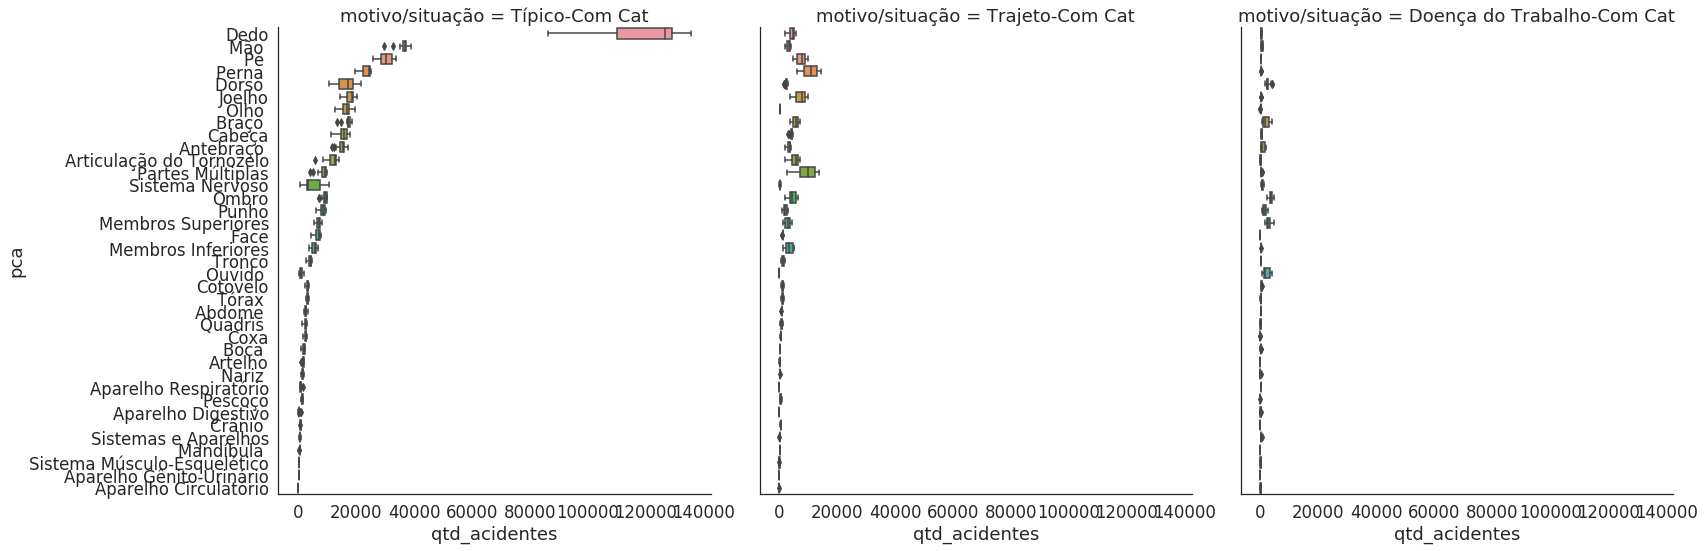

In [89]:
#distribuição da quantidade de acidentes por motivo/situação
plt.figure(figsize = (10,20))
g = sns.catplot(y = "pca",
                x="qtd_acidentes",
                col ="motivo/situação",
                kind = "box",
                height = 8,
                aspect = 1,
                data = df_pca.sort_values("qtd_acidentes",ascending = False))
sns.despine()

## Gráfico de área: Parte do corpo mais atingidas, em média, nos acidentes Típicos-com CAT

In [0]:
#criando df com as médias 
df_pca_agg = df_pca.groupby(by = ["pca","motivo/situação"])[["qtd_acidentes"]].mean()
df_pca_agg.reset_index(inplace=True)

In [91]:
sq = df_pca_agg[df_pca_agg["motivo/situação"]=="Típico-Com Cat"]
sq.sort_values("qtd_acidentes",inplace=True)

my_values = sq.qtd_acidentes


#criando uma coluna apenas com os nomes que representam pelo menos 10% da quantidade total
sq.loc[(sq.qtd_acidentes >= max(my_values)*0.1, 'pca_name')] = sq.pca  
sq.loc[(sq.qtd_acidentes < max(my_values)*0.1, 'pca_name')] = ""

#criando uma paleta de cores
cmap = plt.cm.viridis

mini=min(my_values)
maxi=max(my_values)
norm = mcolors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

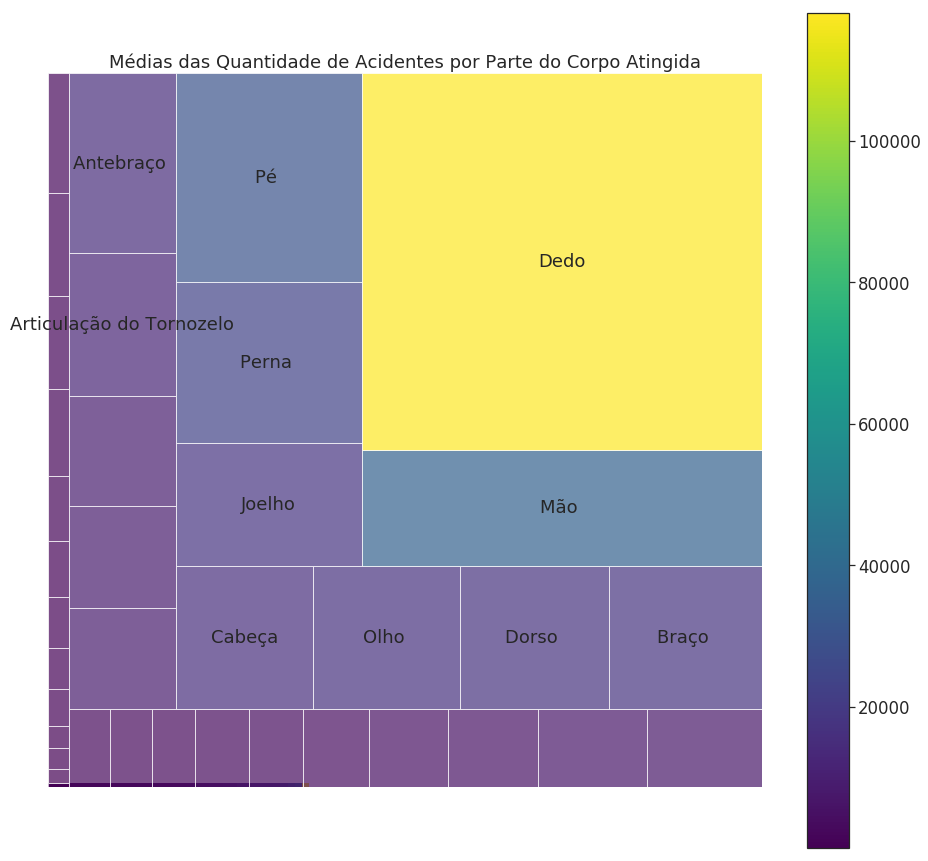

In [92]:
#Fazendo um grafico de área
plt.figure(figsize = (16, 16))

squarify.plot(sizes=sq['qtd_acidentes'],
              label = sq["pca_name"], 
              color = colors,
              alpha=.7 )
plt.title("Médias das Quantidade de Acidentes por Parte do Corpo Atingida")
plt.axis('off')

img = plt.imshow([sq.qtd_acidentes], cmap=cmap)
plt.colorbar(img, orientation="vertical", shrink=.96)

plt.show() 


In [93]:
sq.sort_values("qtd_acidentes",ascending = False).head()

,pca,motivo/situação,qtd_acidentes,pca_name
44,Dedo,Típico-Com Cat,118112.800000,Dedo
65,Mão,Típico-Com Cat,36246.066667,Mão
92,Pé,Típico-Com Cat,30351.400000,Pé
83,Perna,Típico-Com Cat,23509.133333,Perna
53,Joelho,Típico-Com Cat,17900.200000,Joelho


## Percentual do Total Ano a Ano

In [94]:
#df do ano de 2002
df_pca_2002 = df_pca[(df_pca["ano"]==2002) & (df_pca["motivo/situação"]=="Típico-Com Cat")]

df_pca_2002["pct"] = (df_pca_2002.qtd_acidentes / df_pca_2002.qtd_acidentes.sum())*100
# Change: groupby df_pca_2002 and divide by sum
df_pca_2002.sort_values("qtd_acidentes",inplace = True,ascending = False)
df_pca_2002.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ano,pca,motivo/situação,qtd_acidentes,pct
44,2002,Dedo,Típico-Com Cat,86185,26.816830
65,2002,Mão,Típico-Com Cat,35753,11.124698
95,2002,Pé,Típico-Com Cat,27458,8.543674
86,2002,Perna,Típico-Com Cat,22601,7.032397
29,2002,Braço,Típico-Com Cat,18590,5.784358


In [95]:
#df do ano de 2016
df_pca_2016 = df_pca[(df_pca["ano"]==2016) & (df_pca["motivo/situação"]=="Típico-Com Cat")]

df_pca_2016["pct"] = (df_pca_2016.qtd_acidentes / df_pca_2016.qtd_acidentes.sum())*100
# Change: groupby df_pca_2016 and divide by sum
df_pca_2016.sort_values("qtd_acidentes",inplace = True,ascending = False)
df_pca_2016.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ano,pca,motivo/situação,qtd_acidentes,pct
1625,2016,Dedo,Típico-Com Cat,104720,29.574903
1647,2016,Mão,Típico-Com Cat,29639,8.370613
1674,2016,Pé,Típico-Com Cat,27579,7.788830
1665,2016,Perna,Típico-Com Cat,19760,5.580597
1635,2016,Joelho,Típico-Com Cat,15393,4.347274


No ano de 2002 os acidentes que afetavam mãos e dedos representavam 37,9% do total, 14 anos depois eles ainda representam o mesmo valor percentual. 


In [96]:
df_pca.head()

,ano,pca,motivo/situação,qtd_acidentes
0,2002,Abdome,Doença do Trabalho-Com Cat,148
1,2002,Abdome,Trajeto-Com Cat,540
2,2002,Abdome,Típico-Com Cat,2212
3,2002,Antebraço,Doença do Trabalho-Com Cat,1496
4,2002,Antebraço,Trajeto-Com Cat,1912


## Evolução dos acidentes que ocorrem com as partes do corpo mais atingidas

In [0]:
#remover espaços em branco
df_pca.pca = df_pca.pca.str.replace(' ', '')

In [0]:

df_pca_select = df_pca[df_pca["motivo/situação"]=="Típico-Com Cat"]


In [0]:
df_pca_pct = df_pca_select.groupby(['ano', 'pca']).agg({'qtd_acidentes': 'sum'})
# calculando porcentagens
pca_pct = df_pca_pct.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
#tranformando em df
pca_pct.reset_index(inplace=True)
pca_pct.columns = ["ano","pca","qtd_acidentes_pct"]

In [0]:
partes_selecionadas = ["Dedo","Mão","Pé","Perna","Dorso"]
pca_pct = pca_pct[pca_pct["pca"].isin(partes_selecionadas)]

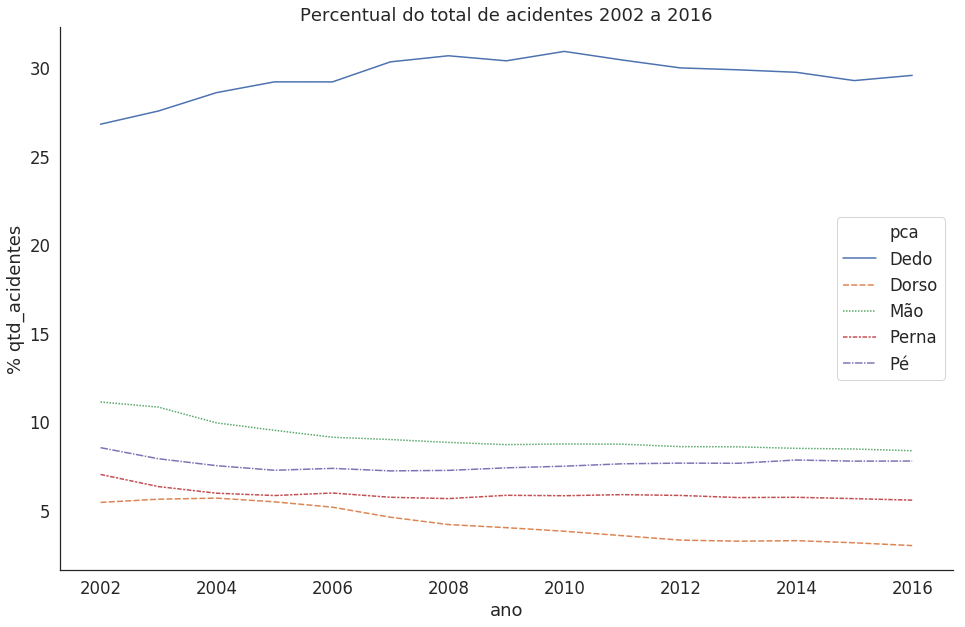

In [101]:
plt.figure(figsize = (16, 10))
g = sns.lineplot(x = "ano",
                 y = "qtd_acidentes_pct",
                 style = "pca",
                 hue = "pca",
                 data = pca_pct)
g.set_title("Percentual do total de acidentes 2002 a 2016")
g.set_ylabel("% qtd_acidentes");
sns.despine()